<a href="https://colab.research.google.com/github/MatheusABomfim/ML_HTLV_HAM-TSP/blob/main/ML_MEST_HTLV%2BMBL2%2BCLINICAL_22_03_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes/reminders:

* Clinical data has been excluded
(because they will still be extracted from the medical records, classifying the oligosymptomatic patients separately, allowing a better evaluation of the machine)

* This script is based on the file: "Based on the ML Wine data set" with the appropriate modifications.

* It uses only one machine-learning evaluation model, several of which will be used in the final master's work. The current script corresponds to a training script developed in conjunction with pacific (more complex).

# Dictionary:
* In column: SEX
  * M = 0
  * F = 1

* In column: HAM/TSP
 * No myelopathy = 0
 * HAM/TSP = 1

In [ ]:
# Att Scikit-learn
!pip uninstall scikit-learn
!pip install scikit-learn

# Install shap package (não consta no google colab)
!pip install shap #Corrigir erro do shap

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.5 MB/s eta 0:00:00


In [22]:
# Import data and packages for work:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score,roc_curve, auc, make_scorer, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
import pandas as pd
from scipy.stats import skew, kurtosis
import shutil
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Data selection
inicial_dataset = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets/Clean_data_HAM_TSP.csv')
# Ignoring flags
import warnings
warnings.filterwarnings('ignore')

# Importing and processing data:

In [2]:
# Import initial file "Clean_data_HAM_TSP"
df = pd.read_table(inicial_dataset, sep='.')  # sep= separator parameter(;)

**Creating a storage directory**

In [ ]:
# Checking the directory
diretorio_name = caminho_arquivo + "/" + nome_arquivo  # cria o diretório a partir das variáveis acima de caminho e nome_arquivo
try:
    os.mkdir(diretorio_name)  # tenta criar o diretório
    print("Novo Diretório Criado! \n")
except FileExistsError:
    print("O diretório já existe!")
    print(diretorio_name)
    print("--> Verifique se ele está vazio, ou possui arquivos! \n")

# Dataframe format (rows, columns)
print('Dados carregados! \nO seu dado apresenta o seguinte quantitativo de (linhas, colunas):', df.shape)

O diretório já existe!
/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_final(MBL+Clinica)/tabela_Vanessa_Treinamento_ML
--> Verifique se ele está vazio, ou possui arquivos! 

Dados carregados! 
O seu dado apresenta o seguinte quantitativo de (linhas, colunas): (155, 68)


In [ ]:
# Checking the data frame
print(df)

In [3]:
# Transformation of categorical nominal data into categorical numerical data:
df['SEXO'] = df['SEXO'].replace('M',0)
df['SEXO'] = df['SEXO'].replace('F',1)
df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO',0)
df['HAM/TSP'] = df['HAM/TSP'].replace('SIM',1)

# Elimination of data that is cloudy:
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]

# Delete columns that will not be used:
df = df.drop('SINTOMAS', axis=1)
df = df.drop('SINT. DET.', axis=1)
df = df.drop('ANO DE DIAGNOSTICO', axis=1)
df = df.drop('REGISTRO', axis=1)
df = df.drop('NUM AMO', axis=1)
df = df.drop('Baixo fluxo urinário', axis=1)
df = df.drop('Câimbras', axis=1)
df = df.drop('Edema MMSS', axis=1)

# Transforming string data into float64:
df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'],errors = 'coerce')

# Removal of rows with null values:
df = df.dropna()

In [ ]:
df.columns
#print(df)

**Exploratory analysis**




Target frequency distribution (HAM/TSP)

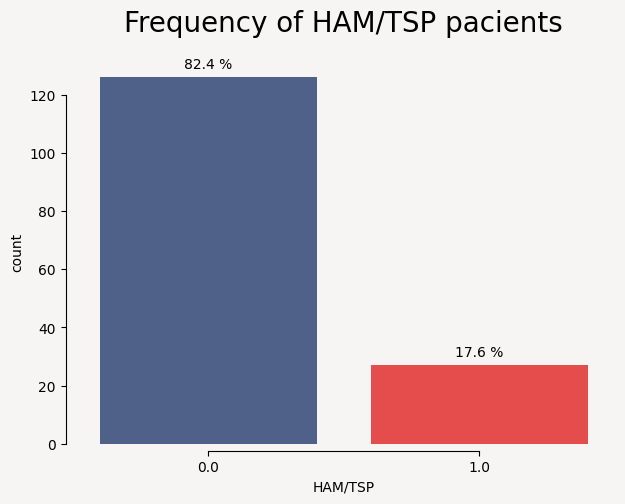

In [ ]:
# Color palette
mypal= ['#465d91', '#FFFFE0','#FF3232']

# Bar Graph for Distribution of Variables
plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HAM/TSP'], palette=mypal[0::2])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center")

ax.set_title('Frequency of HAM/TSP pacients', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Save the graphic in PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/' + 'Frequência_HAM_TSP.pdf')

Pearson correlation matrix initial dataset (heatmap):

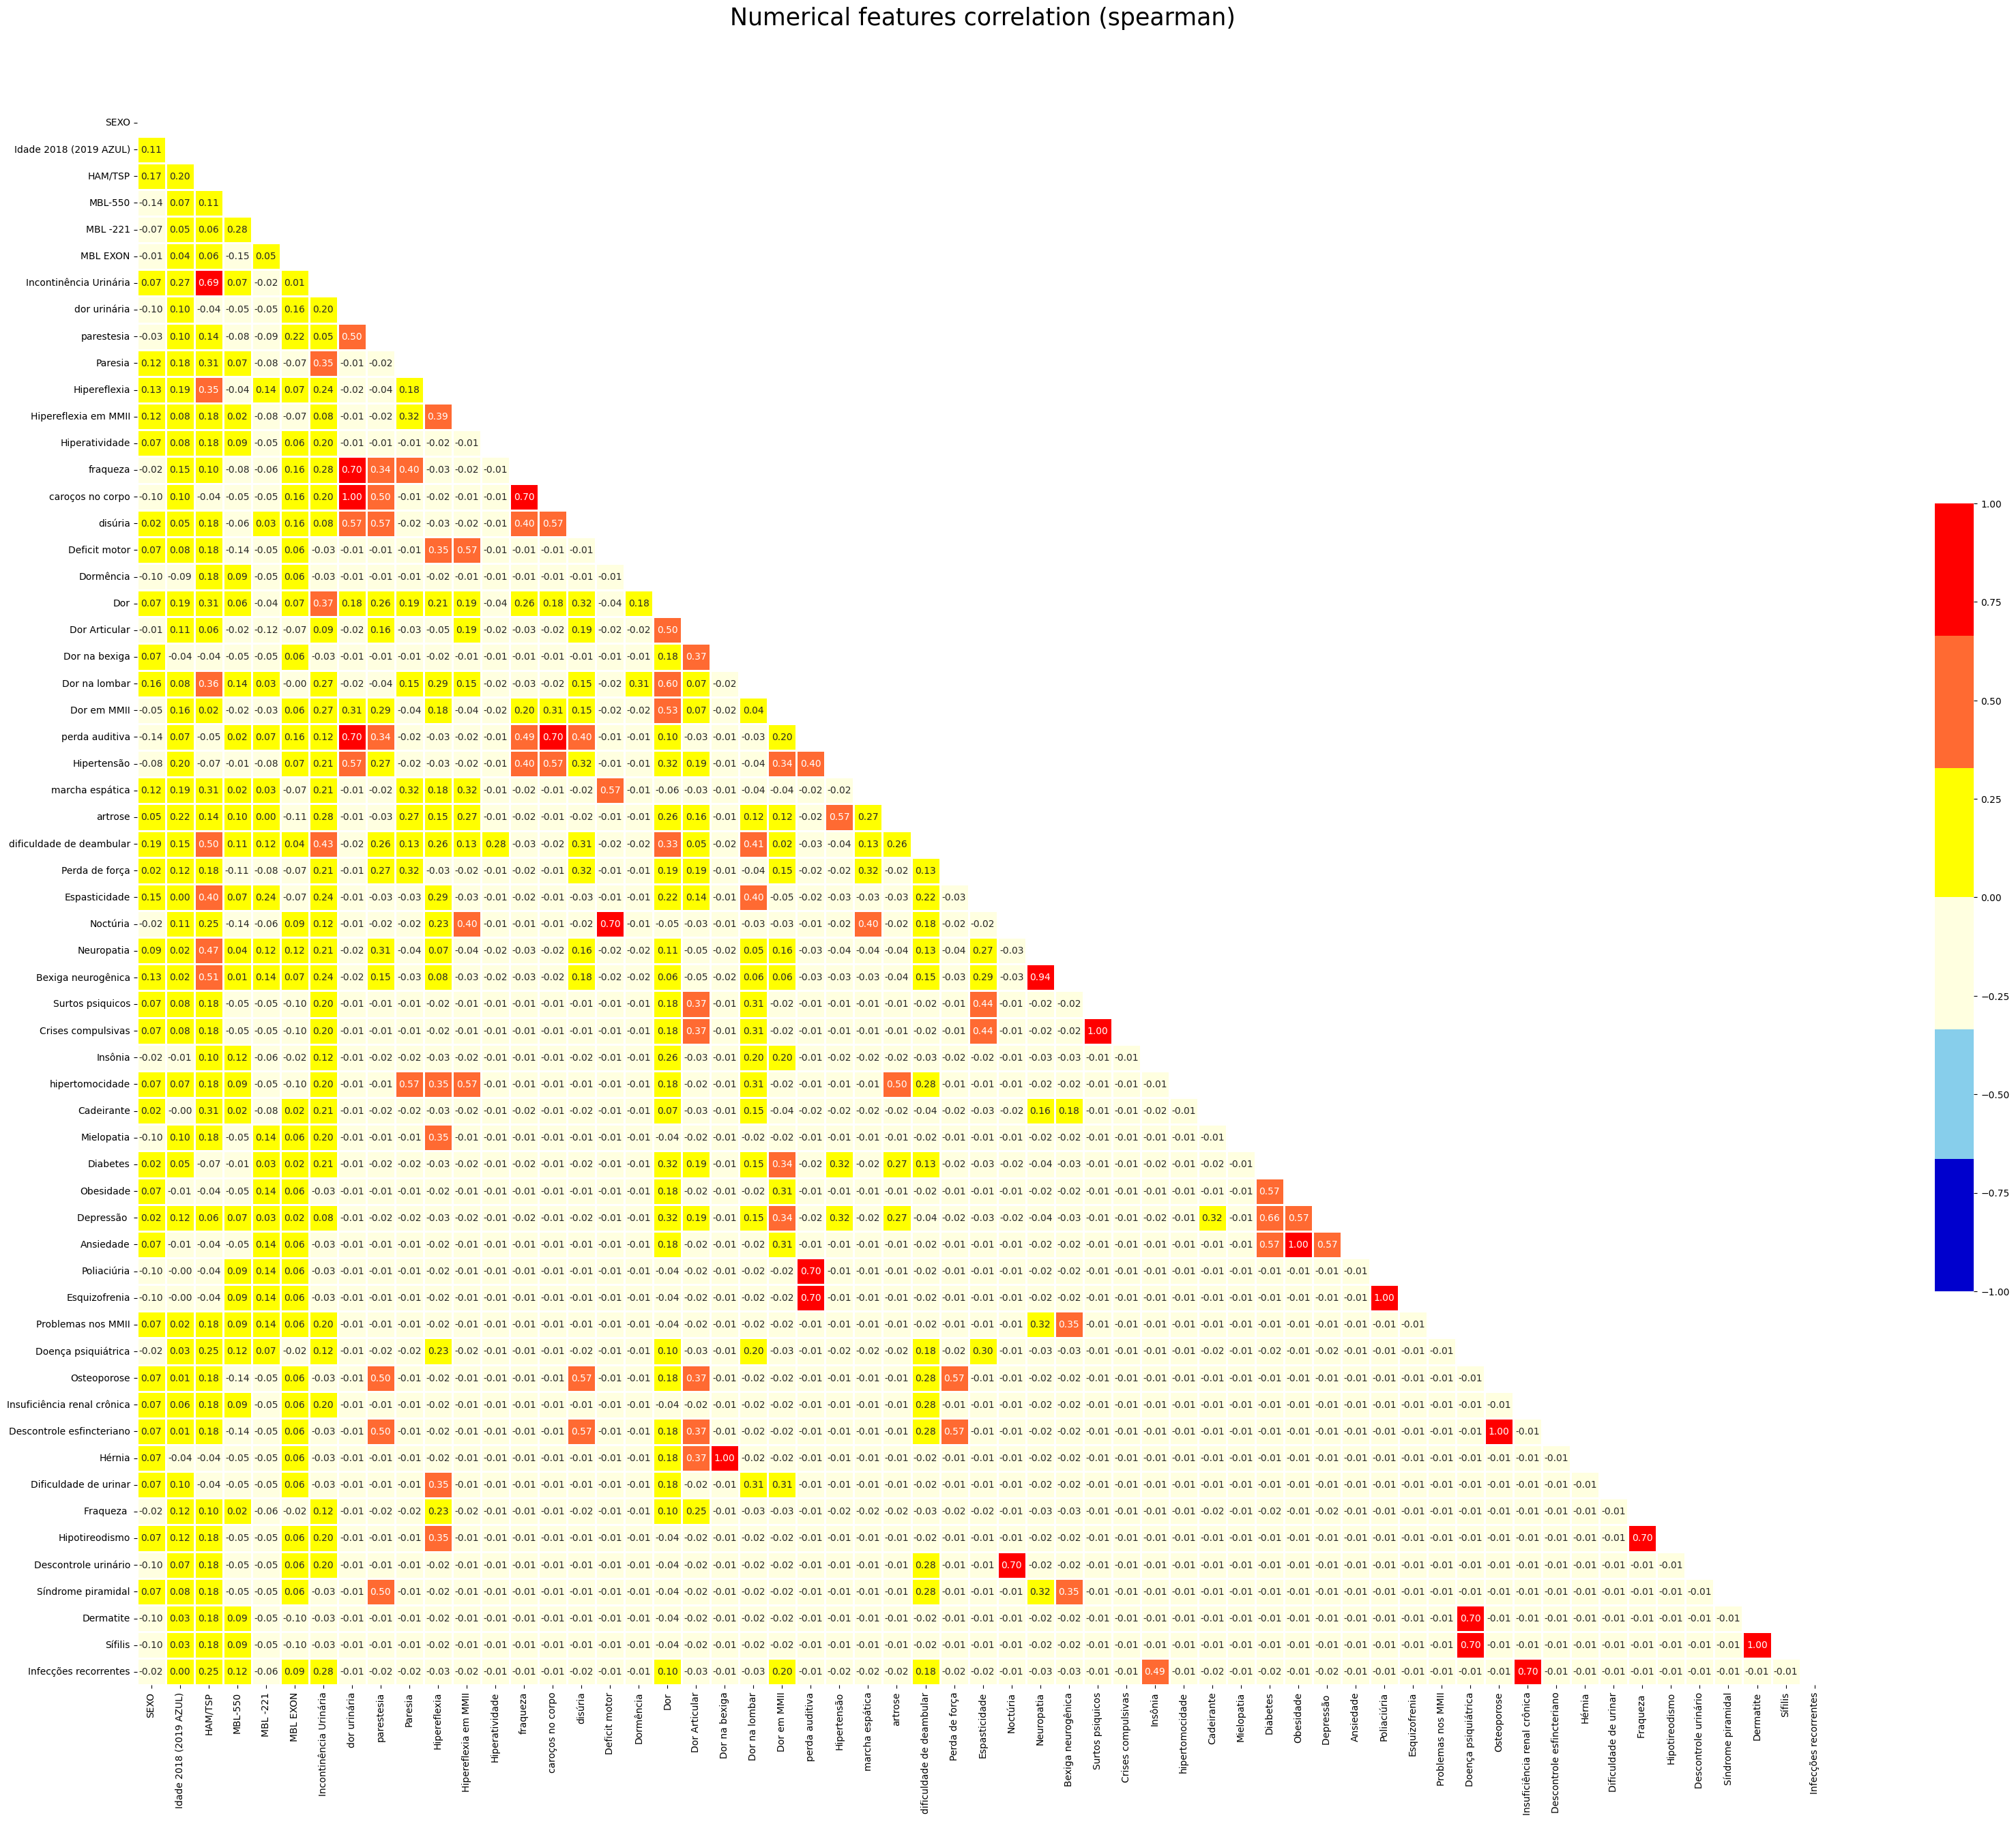

In [ ]:
# Correlation
from scipy.stats import mannwhitneyu

mypal= ['#0000CD', '#87CEEB', '#FFFFE0','#FFFF00', '#ff6a32','#FF0000']
#'#FF0000', '#FF4500', '#FFFF00','#FFFFE0', '#87CEEB','#0000CD'
metodo_correlacao = "spearman"
df_ = df

#df_ = np.round(df_.reset_index(drop=True), 2)
corr = df_.corr(method= metodo_correlacao)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(40, 30), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=1, cbar_kws={"shrink": 0.5}, fmt='.2f')
ax.set_title("Numerical features correlation ("+metodo_correlacao+")", fontsize=25, y= 1.05);


# Save the graphic in PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/' + 'initial_df_plot_heatmap_corr_pearson.pdf')

plt.show()

# **Evaluation of multicollinearity**

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Carregar o DataFrame df

# Adiciona uma coluna de constantes ao DataFrame
df_with_const = add_constant(df)

# Lista para armazenar os resultados do VIF
vif_data = []

# Índice da coluna 'HAM/TSP' no DataFrame
index_ham_tsp = df.columns.get_loc('HAM/TSP')

# Função para calcular o VIF em relação à coluna 'HAM/TSP'
def calculate_vif(column_index):
    return variance_inflation_factor(df.values, column_index)

# Calcular o VIF para cada variável em relação à coluna 'HAM/TSP'
for i, column in enumerate(df.columns):
    if column != 'const' and column != 'HAM/TSP':
        vif = calculate_vif(i)
        vif_data.append((column, vif))

# Converter os resultados em um DataFrame
vif_df = pd.DataFrame(vif_data, columns=["Variable", "VIF"])

# Salvar o DataFrame em um arquivo Excel
caminho_arquivo = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/VIF_data.xlsx'
vif_df.to_excel(caminho_arquivo, index=False, engine='openpyxl')

In [ ]:
print(df)

# **Filter feature selection**
Creation of a new data table, transforming the binary variables referring to urinary dysfunctions into categorical numerical variables, exclusion of uninformative columns and transformation of pain subtypes into just pain.

Dictionary:
- Urinary_symptoms:
  - Polyuria: 1
  - Neurogenic bladder: 2
  - Neurogenic bladder + urinary incontinence:3
  - Nocturia:4
  - Nocturia + urinary incontinence: 5
  - Dysuria: 6
  - Dysuria + neurogenic bladder: 7

  At this point, df is the new data set with the change in the selected characteristics

In [ ]:
# Path to the Excel file
cat_data = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets/df_cat.csv'

# Import "cat data" file
df = pd.read_table(cat_data, sep=',')

# Removal of rows with null values:
df = df.dropna()

# show the DataFrame
print(df)

**VIF for the new data frame, in order to identify possible multicollinearity**

In [26]:
# Adds a column of constants to the DataFrame
df_with_const = add_constant(df)

# List to storage the VIF results
vif_data = []

# Index of the 'HAM/TSP' column in the DataFrame
index_ham_tsp = df.columns.get_loc('HAM/TSP')

# Function to calculate the VIF in relation to the 'HAM/TSP' column
def calculate_vif(column_index):
    return variance_inflation_factor(df.values, column_index)

# Calculate the VIF for each variable in relation to the 'HAM/TSP' column
for i, column in enumerate(df.columns):
    if column != 'const' and column != 'HAM/TSP':
        vif = calculate_vif(i)
        vif_data.append((column, vif))

# Convert the results into a DataFrame
vif_df = pd.DataFrame(vif_data, columns=["Variable", "VIF"])

# Save the DataFrame in an Excel file
caminho_arquivo = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/VIF_data_cat.xlsx'
vif_df.to_excel(caminho_arquivo, index=False, engine='openpyxl')

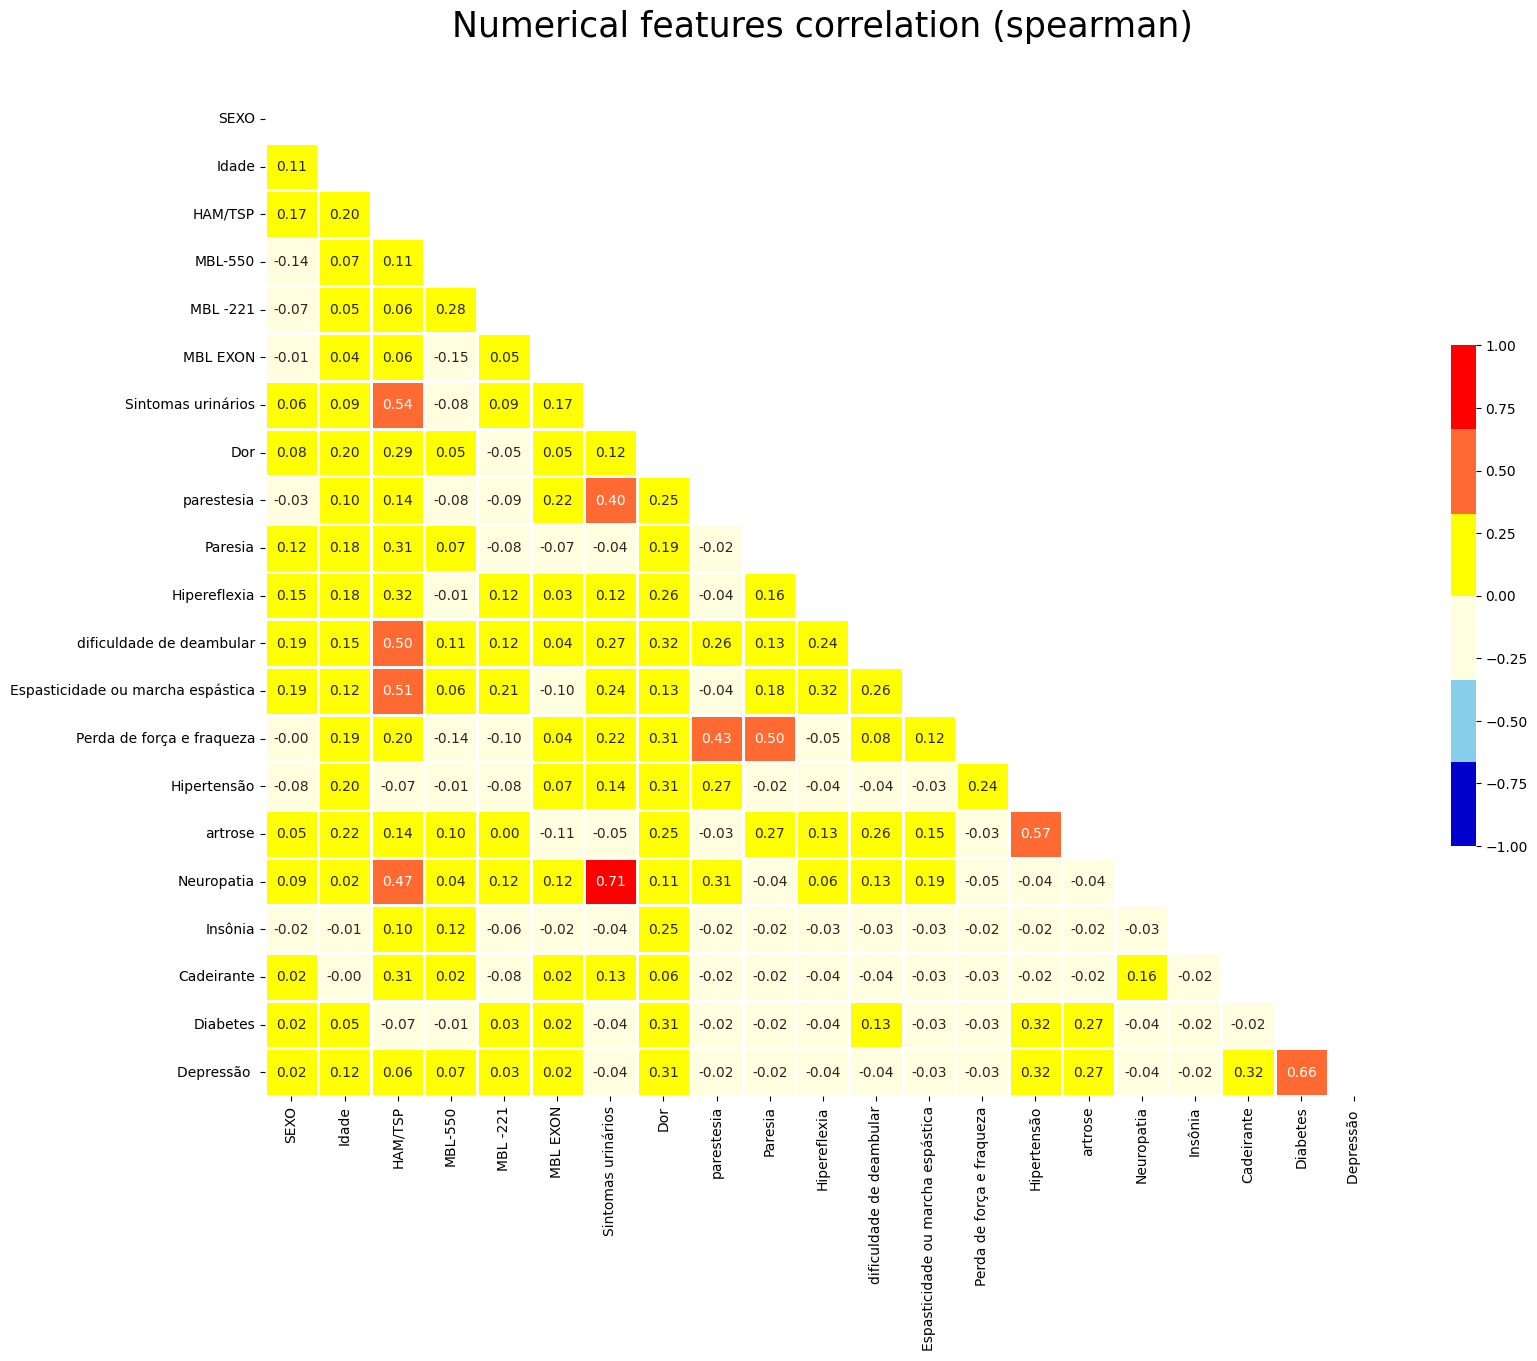

In [ ]:
# Correlation of cat_df

mypal= ['#0000CD', '#87CEEB', '#FFFFE0','#FFFF00', '#ff6a32','#FF0000']
metodo_correlacao = "spearman"
df_ = df

#df_ = np.round(df_.reset_index(drop=True), 2)
corr = df_.corr(method= metodo_correlacao)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 13), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=1, cbar_kws={"shrink": 0.5}, fmt='.2f')
ax.set_title("Numerical features correlation ("+metodo_correlacao+")", fontsize=25, y= 1.05);


# Save the graphic in PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/' + 'cat_df_plot_heatmap_corr_pearson.pdf')

plt.show()

In [5]:
# Data division
# Binary categorical data
cat_bin = ['SEXO', 'Idade', 'HAM/TSP', 'Sintomas urinários', 'Dor',
        'parestesia', 'Paresia', 'Hipereflexia',
       'dificuldade de deambular', 'Espasticidade ou marcha espástica',
       'Perda de força e fraqueza', 'Hipertensão', 'artrose', 'Neuropatia',
       'Insônia', 'Cadeirante', 'Diabetes', 'Depressão ']

# Multiple categorical data
cat_mult= ['MBL-550', 'MBL -221', 'MBL EXON']

# All data
all_data = cat_bin + cat_mult

Cleaning non-numerical data with no predictive value for ML

In [7]:
# Separate the variables into predictors and target variables (style);
y = df['HAM/TSP'] # Target variables;
x = df.drop('HAM/TSP', axis = 1) # Predict variables, without aim;

#**Cross-validation + ROC Curve + Mean AUC for default hyperparameters**


In [13]:
# Clearing old data from the data_table, if the code has been run previously
data_table = pd.DataFrame()
seed = None

# List of ML packages that we will run
classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

# Name of ML algorithms that we will use
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

# Initialize StratifiedKFold
skf = StratifiedKFold(5)

# Creating the avaliatives metrics for ROC curve
for item, nome in zip(classifiers, names):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

# Testing the model
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)): # metrics
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        item.fit(x_train, y_train)

# Ploting avaliative metrics of ROC curva
#        y_proba = item.predict_proba(x_test)
 #       fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
  #      roc_auc = auc(fpr, tpr)
   #     plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f"ROC fold {fold} (AUC = {roc_auc:.2f})")
    #    tprs.append(np.interp(mean_fpr, fpr, tpr))
     #   tprs[-1][0] = 0.0
      #  aucs.append(roc_auc)

#    mean_tpr = np.mean(tprs, axis=0)
 #   mean_tpr[-1] = 1.0
  #  mean_auc = auc(mean_fpr, mean_tpr)
#    std_auc = np.std(aucs)
 #   plt.plot(mean_fpr, mean_tpr, color='b', label=f"Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=2, alpha=0.8)

#    std_tpr = np.std(tprs, axis=0)
 #   tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  #  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
   # plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label='± 1 std. dev.')

#    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
 #   plt.xlabel('False Positive Rate')
  #  plt.ylabel('True Positive Rate')
   # plt.title(f'Mean ROC curve with variability ' + nome)
    #plt.legend(loc="lower right")
#    plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/' + 'Mean ROC curve with variability ' + nome + '.pdf')
 #   plt.show()


# Calculation and print of F1 and associated metrics
    precision_mean_score = cross_val_score(item, x, y, scoring="precision", cv=5).mean()
    std_score = cross_val_score(item, x, y, scoring="precision", cv=5).std()
    accuracy_mean_score = cross_val_score(item, x, y, scoring="accuracy", cv=5).mean()
    recall_mean_score = cross_val_score(item, x, y, scoring="recall", cv=5).mean()
    f1_mean_score = cross_val_score(item, x, y, scoring="f1", cv=5).mean()

    print(f"Média da precisão: {precision_mean_score}")
    print(f"Media do desvio padrão: {std_score}")
    print(f"Média da acurácia: {accuracy_mean_score}")
    print(f"Media da taxa de recall: {recall_mean_score}")
    print(f"Media do parâmetro f1: {f1_mean_score}")

# Creating the data frames that  values to be saved
    results_mean_precision = pd.DataFrame({'Precision Mean': [precision_mean_score]})
    results_mean_accuracy = pd.DataFrame({'Accuracy Mean': [accuracy_mean_score]})
    results_mean_recall = pd.DataFrame({'Recall Mean': [recall_mean_score]})
    results_mean_f1 = pd.DataFrame({'F1 Mean': [f1_mean_score]})

# creating the data frames (with the values of interest) that will be plotted in txt file
    f1_metrics = pd.DataFrame(
    [{
        "Nome": nome,
        "Accuracy": results_mean_accuracy.iloc[0]['Accuracy Mean'],
        "Recall": results_mean_recall.iloc[0]['Recall Mean'],
        "Precision": results_mean_precision.iloc[0]['Precision Mean'],
        "F1 Score": results_mean_f1.iloc[0]['F1 Mean'],
    }]
)

    data_table = data_table.append(f1_metrics)
data_table = np.round(data_table.reset_index(drop=True), 2)

# Aesthetic transformation similar to a heatmap
styled_table = data_table.sort_values(by='Accuracy', ascending=False)\
      .style.background_gradient(cmap='coolwarm')\
      .bar(subset=['Recall'], color='#ff355d')\
      .bar(subset=['Precision'], color='lightseagreen')\
      .bar(subset=['F1 Score'], color='gold')\

#plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/' + f'Mean ROC curve with variability {nome}.pdf')

# Save the generated excel file
styled_table.to_excel('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/'+"F1_metrics.xlsx", engine='openpyxl')

Média da precisão: 0.8
Media do desvio padrão: 0.26666666666666666
Média da acurácia: 0.8821505376344086
Media da taxa de recall: 0.52
Media do parâmetro f1: 0.5894660894660895
Média da precisão: 0.5
Media do desvio padrão: 0.4472135954999579
Média da acurácia: 0.8501075268817203
Media da taxa de recall: 0.19333333333333333
Media do parâmetro f1: 0.26428571428571423
Média da precisão: 0.7563636363636363
Media do desvio padrão: 0.33172947478999276
Média da acurácia: 0.8681720430107527
Media da taxa de recall: 0.7000000000000001
Media do parâmetro f1: 0.7016993464052288
Média da precisão: 0.8071428571428572
Media do desvio padrão: 0.2781131761990255
Média da acurácia: 0.9015053763440861
Media da taxa de recall: 0.66
Media do parâmetro f1: 0.65
Média da precisão: 0.7866666666666667
Media do desvio padrão: 0.2745501370929867
Média da acurácia: 0.8819354838709679
Media da taxa de recall: 0.6333333333333333
Media do parâmetro f1: 0.6653102453102452
Média da precisão: 0.7771428571428571
Media

# **Overfit anaylisis**

**Learning curve of model and test groups**

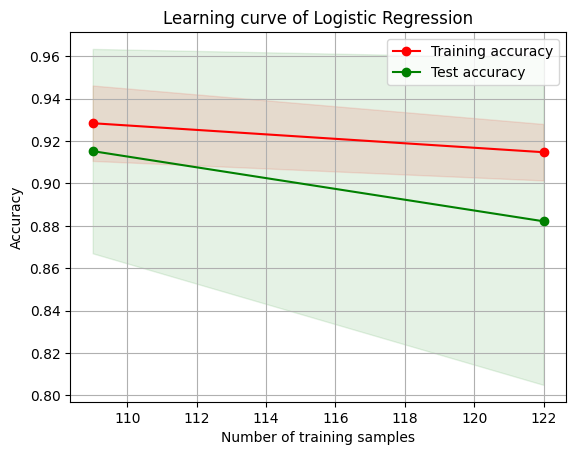

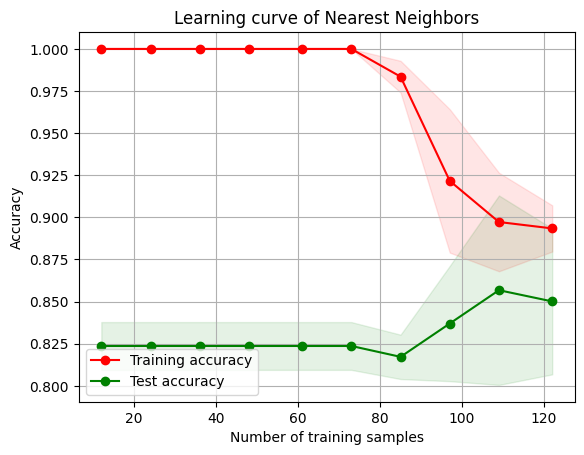

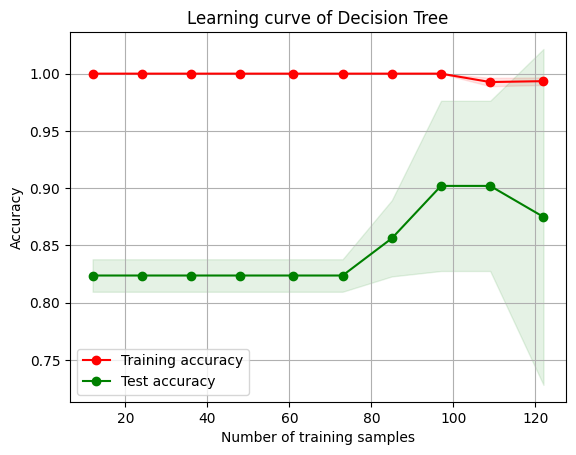

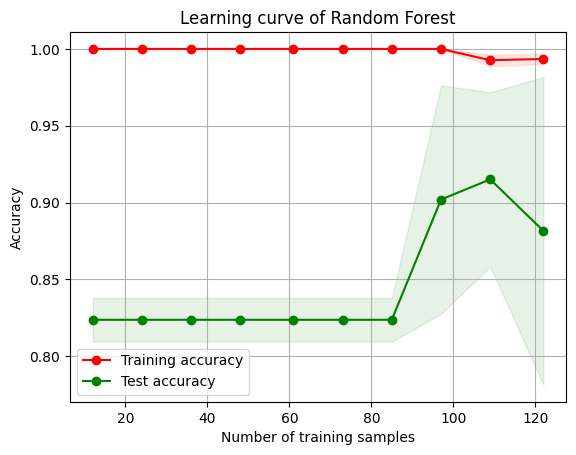

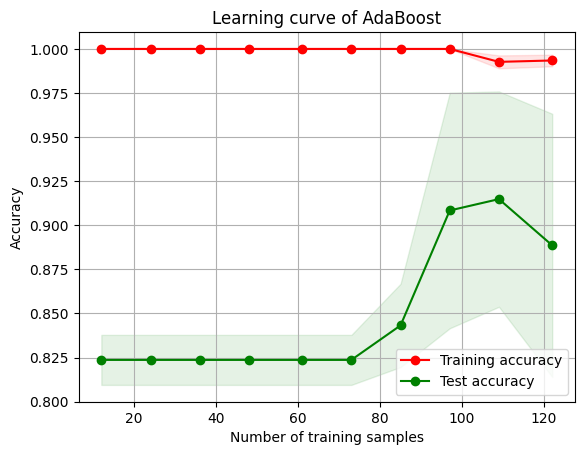

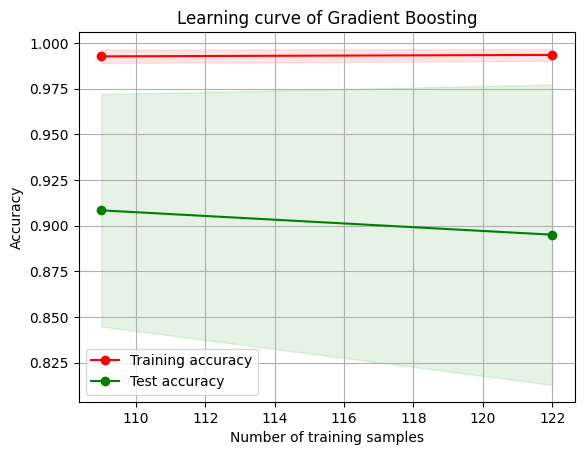

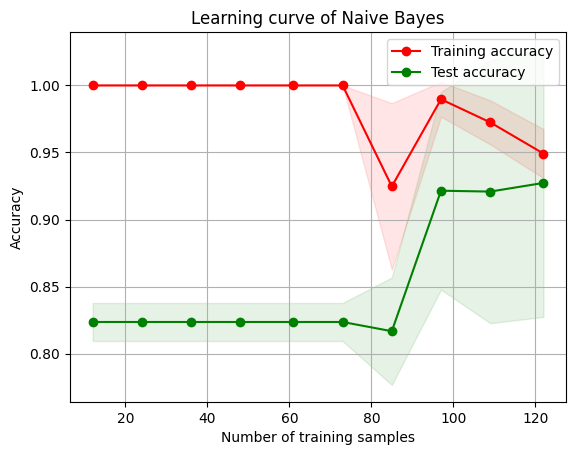

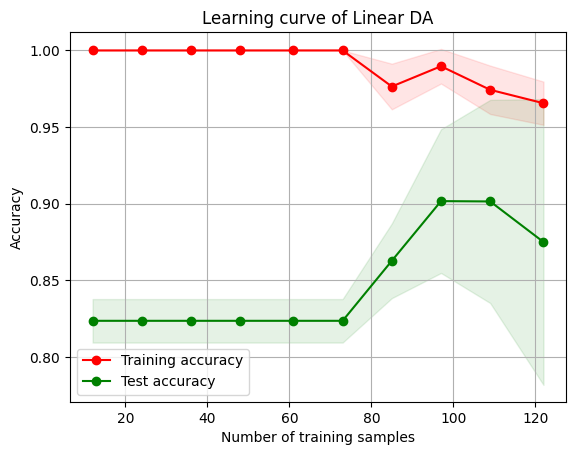

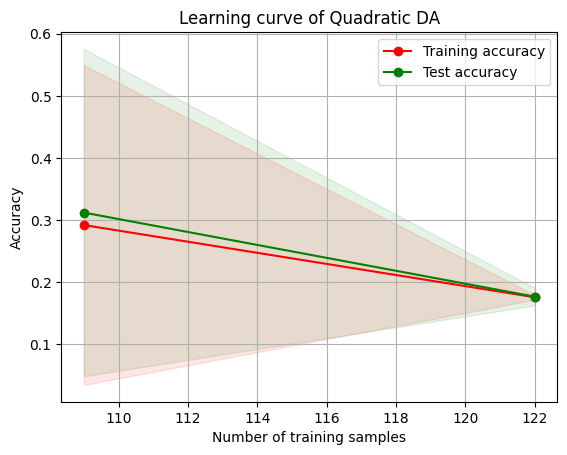

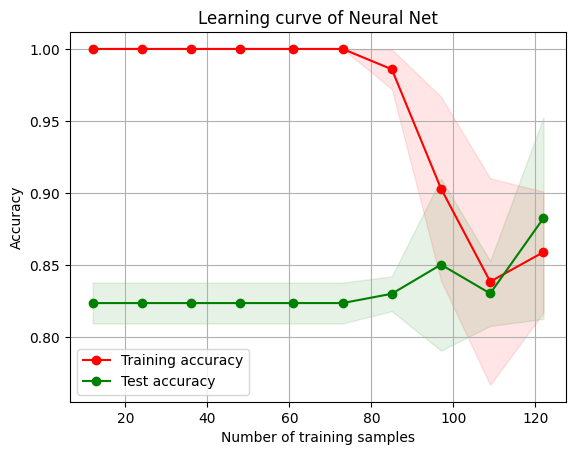

In [21]:
# Creating the avaliatives metrics for ROC curve
for item, nome in zip(classifiers, names):

# Scaling the learning curve
  curve_size = np.linspace(0.1, 1.0, 10) #Showing 10% to 100%, in a total of 10 values

# Calculate the learning curve
  train_sizes_abs, train_scores, test_scores = learning_curve(item, x, y, train_sizes=curve_size, cv=skf, scoring='accuracy')

# Calculate the means and standard deviations of the scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
  plt.figure()
  plt.title(f"Learning curve of {nome}")
  plt.xlabel("Number of training samples")
  plt.ylabel("Accuracy")
  plt.grid()

  plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
  plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r",
         label="Training accuracy")
  plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g",
         label="Test accuracy")

  plt.legend(loc="best")
  plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/{nome}_learning_curve.pdf')
  plt.show()

In [ ]:
# Searching the best hyperparameters for decision tree
# Define the parameter grid by pre-pruning techniques
param_grid = {'criterion':["gini","entropy"],
'max_depth': [2, 3, 4, 5],
'min_samples_leaf': [10, 20, 30],
'min_samples_split': [20, 30, 40],}

# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Create an instance of the GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=skf)

# Fit the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Print the best set of hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

In [41]:
# Searching the best hyperparameters for decision tree
# Define the parameter grid by post-pruning techniques

# Calculate the pruning path by cost complexity
path = clf.cost_complexity_pruning_path(x, y)
alphas, impurities = path.ccp_alphas, path.impurities
print("Alphas:", alphas)

# Definir o grid de parâmetros com os valores de alpha
param_grid = {'ccp_alpha': alphas}

# Instantiate GridSearchCV with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=skf)
grid_search.fit(x, y)

# Obter o melhor valor de alpha
best_alpha = grid_search.best_params_['ccp_alpha']
print("Best Alpha:", best_alpha)

Alphas: [0.         0.00213974 0.00632793 0.01198257 0.01209598 0.02275494
 0.05325625 0.09325791]
Best Alpha: 0.05325624896043801


In [11]:
# Clearing old data from the data_table, if the code has been run previously
data_table = pd.DataFrame()
seed = None
n_splits = 5

# List of ML packages that we will run
classifiers = [
    #LogisticRegression(solver="liblinear", random_state=seed),
    #KNeighborsClassifier(2),
    DecisionTreeClassifier(random_state = None, criterion ='gini',
                           max_depth = 2, min_samples_leaf = 10,
                           min_samples_split = 20)
    #RandomForestClassifier(random_state=seed),
    #AdaBoostClassifier(random_state=seed),
    #GradientBoostingClassifier(random_state=seed),
    #GaussianNB(),
    #LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis(),
    #MLPClassifier(random_state=seed),
]

# Name of ML algorithms that we will use
names = [
    #'Logistic Regression',
    #'Nearest Neighbors',
    'Decision Tree',
    #'Random Forest',
    #'AdaBoost',
    #'Gradient Boosting',
    #'Naive Bayes',
    #'Linear DA',
    #'Quadratic DA',
    #"Neural Net"
]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

# Creating the avaliatives metrics for ROC curve
for item, nome in zip(classifiers, names):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

# Testing the model
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)): # metrics
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        item.fit(x_train, y_train)

# Ploting avaliative metrics of ROC curva
#        y_proba = item.predict_proba(x_test)
 #       fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
  #      roc_auc = auc(fpr, tpr)
   #     plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f"ROC fold {fold} (AUC = {roc_auc:.2f})")
    #    tprs.append(np.interp(mean_fpr, fpr, tpr))
     #   tprs[-1][0] = 0.0
      #  aucs.append(roc_auc)

#    mean_tpr = np.mean(tprs, axis=0)
 #   mean_tpr[-1] = 1.0
  #  mean_auc = auc(mean_fpr, mean_tpr)
#    std_auc = np.std(aucs)
 #   plt.plot(mean_fpr, mean_tpr, color='b', label=f"Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=2, alpha=0.8)

#    std_tpr = np.std(tprs, axis=0)
 #   tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  #  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
   # plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label='± 1 std. dev.')

#    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
 #   plt.xlabel('False Positive Rate')
  #  plt.ylabel('True Positive Rate')
   # plt.title(f'Mean ROC curve with variability ' + nome)
    #plt.legend(loc="lower right")
#    plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/' + 'Mean ROC curve with variability ' + nome + '.pdf')
 #   plt.show()


# Calculation and print of F1 and associated metrics
    precision_mean_score = cross_val_score(item, x, y, scoring="precision", cv=5).mean()
    std_score = cross_val_score(item, x, y, scoring="precision", cv=5).std()
    accuracy_mean_score = cross_val_score(item, x, y, scoring="accuracy", cv=5).mean()
    recall_mean_score = cross_val_score(item, x, y, scoring="recall", cv=5).mean()
    f1_mean_score = cross_val_score(item, x, y, scoring="f1", cv=5).mean()

    print(f"Média da precisão: {precision_mean_score}")
    print(f"Media do desvio padrão: {std_score}")
    print(f"Média da acurácia: {accuracy_mean_score}")
    print(f"Media da taxa de recall: {recall_mean_score}")
    print(f"Media do parâmetro f1: {f1_mean_score}")

# Creating the data frames that  values to be saved
    results_mean_precision = pd.DataFrame({'Precision Mean': [precision_mean_score]})
    results_mean_accuracy = pd.DataFrame({'Accuracy Mean': [accuracy_mean_score]})
    results_mean_recall = pd.DataFrame({'Recall Mean': [recall_mean_score]})
    results_mean_f1 = pd.DataFrame({'F1 Mean': [f1_mean_score]})

# creating the data frames (with the values of interest) that will be plotted in txt file
    f1_metrics = pd.DataFrame(
    [{
        "Nome": nome,
        "Accuracy": results_mean_accuracy.iloc[0]['Accuracy Mean'],
        "Recall": results_mean_recall.iloc[0]['Recall Mean'],
        "Precision": results_mean_precision.iloc[0]['Precision Mean'],
        "F1 Score": results_mean_f1.iloc[0]['F1 Mean'],
    }]
)

    data_table = data_table.append(f1_metrics)
data_table = np.round(data_table.reset_index(drop=True), 2)

# Aesthetic transformation similar to a heatmap
styled_table = data_table.sort_values(by='Accuracy', ascending=False)\
      .style.background_gradient(cmap='coolwarm')\
      .bar(subset=['Recall'], color='#ff355d')\
      .bar(subset=['Precision'], color='lightseagreen')\
      .bar(subset=['F1 Score'], color='gold')\

#plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/' + f'Mean ROC curve with variability {nome}.pdf')

# Save the generated excel file
#styled_table.to_excel('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/'+"F1_metrics.xlsx", engine='openpyxl')

Média da precisão: 0.5
Media do desvio padrão: 0.4472135954999579
Média da acurácia: 0.8301075268817204
Media da taxa de recall: 0.19333333333333333
Media do parâmetro f1: 0.26428571428571423


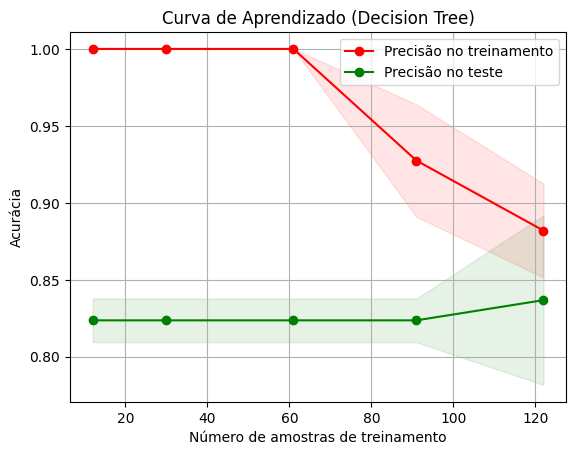

In [12]:
from sklearn.model_selection import learning_curve, StratifiedKFold
import matplotlib.pyplot as plt

# Supondo que 'classifiers' e 'names' sejam definidos anteriormente

# Defina os tamanhos do conjunto de treinamento para os quais deseja calcular a curva de aprendizado
train_sizes = [0.1, 0.25, 0.5, 0.75, 1.0]

# Inicialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

for item, nome in zip(classifiers, names):
    # Calcule a curva de aprendizado
    train_sizes_abs, train_scores, test_scores = learning_curve(item, x, y, cv=skf, train_sizes=train_sizes, scoring='accuracy')

    # Calcule as médias e os desvios padrão dos escores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plote a curva de aprendizado
    plt.figure()
    plt.title(f"Curva de Aprendizado ({nome})")
    plt.xlabel("Número de amostras de treinamento")
    plt.ylabel("Acurácia")
    plt.grid()

    plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r",
             label="Precisão no treinamento")
    plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g",
             label="Precisão no teste")
    plt.legend(loc="best")
    #plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/{nome}_learning_curve.pdf')
    plt.show()


# **Evaluation of permutation importance in test and training groups**

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import os
import shutil

# Create the column_names matrix
column_names = df.columns
n_splits = 5
data_table = pd.DataFrame()
seed = 42

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

for item, nome in zip(classifiers, names):
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        item.fit(x_train, y_train)

    # Calculate the importance of permutation using the "item" model
    features_contribution = permutation_importance(item, x_train, y_train, n_repeats=30, random_state=0)
    sorted_index = np.argsort(features_contribution.importances_mean)

    # Check that the number of columns_names is equal to the consistent sorted_index
    num_features = min(len(column_names), len(sorted_index))

    # Printing permutation importance values and sending them to the drive
    with open(f'Permutation_importance.txt {nome}', 'w') as arquivo:
        print(f'Classifier: {nome}', file=arquivo)
        for i in range(num_features):
            coluna = df.columns[sorted_index[i]]
            print(f"Feature: {coluna} - Importance: {features_contribution.importances_mean[sorted_index[i]]:.3f} +/- {features_contribution.importances_std[sorted_index[i]]:.3f}", file=arquivo)
            print(file=arquivo)

    # Define the y-axis labels as the names of the columns sorted by importance
    caminho_arquivo = f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Permutation_results_txt/Permutation_importance_{nome}.txt'
    caminho_origem = f'Permutation_importance.txt {nome}'
    if os.path.exists(caminho_origem):
        # Move the file to the destination
        shutil.move(caminho_origem, caminho_arquivo)
        print(f"Arquivo referente ao modelo {nome} salvo com sucesso!")
    else:
        print(f"Arquivo referente ao modelo {nome} não foi encontrado")

    # Plotting the horizontal bar chart
    plt.figure(figsize=(25, 8))
    plt.barh(range(x_train.shape[1]), features_contribution.importances_mean[sorted_index], color='skyblue')
    plt.yticks(range(x_train.shape[1]), [column_names[i] for i in sorted_index], fontsize=10)
    plt.xlabel('Contribution to the model')
    plt.title(f'Permutation importance by {nome} model', fontsize=20, y=1.05)

    plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Permutation_graphics/Permutation_importance_{nome}.jpeg')
    plt.show()


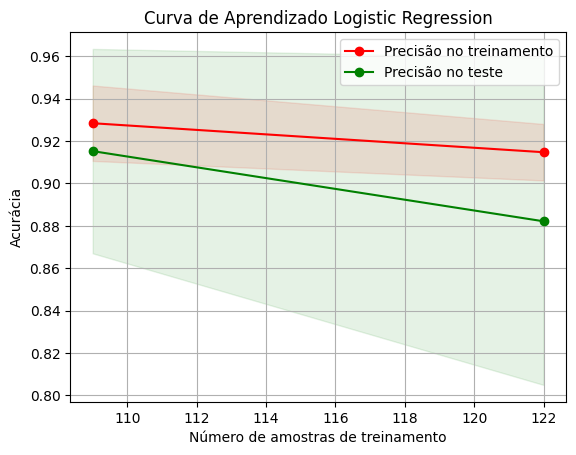

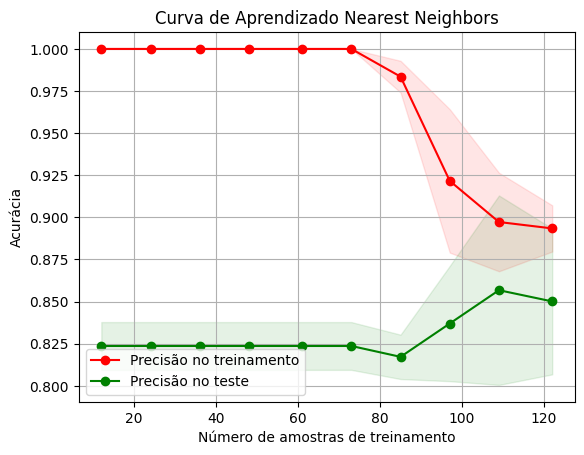

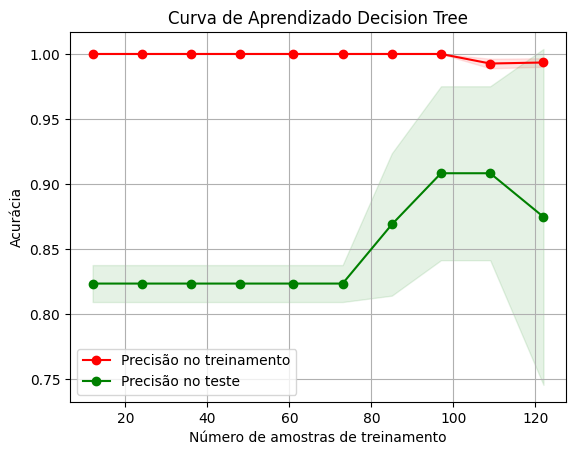

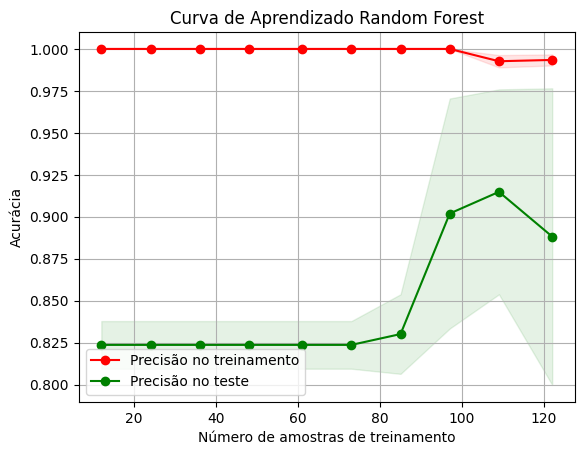

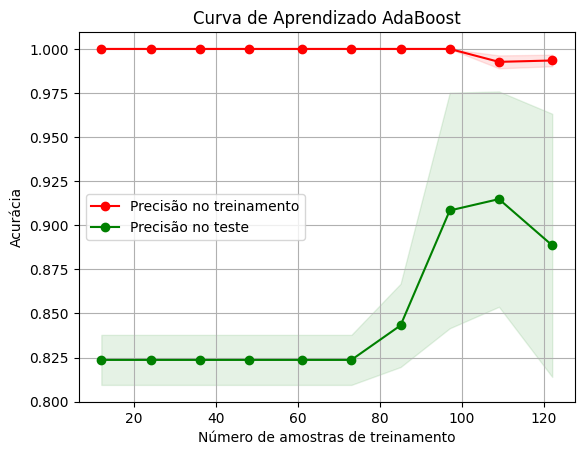

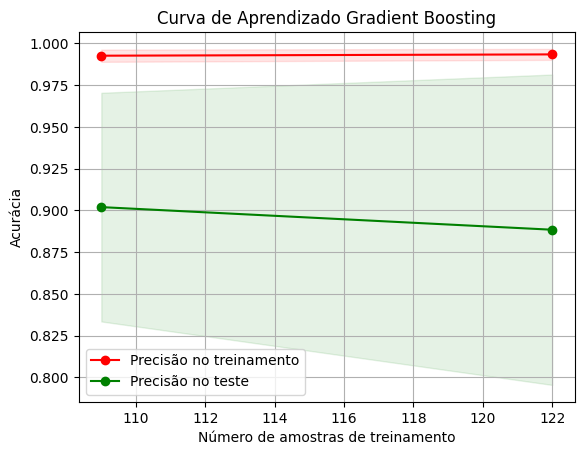

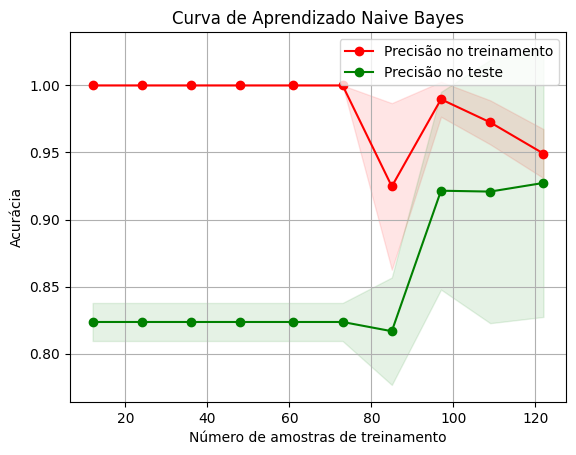

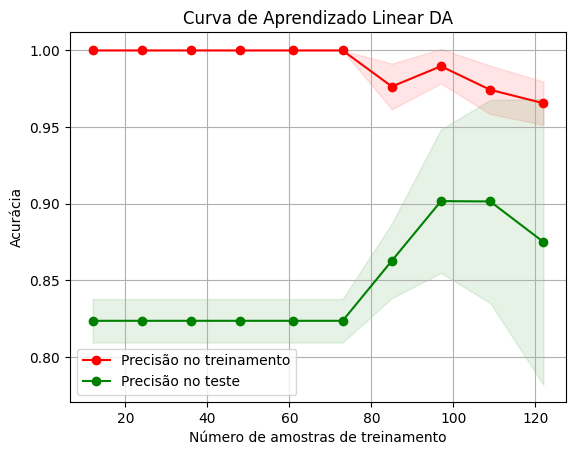

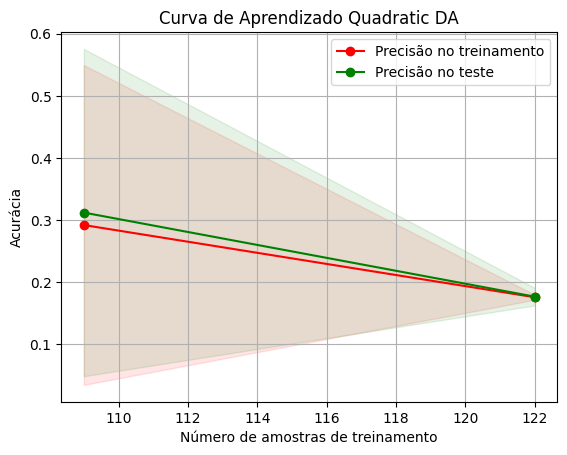

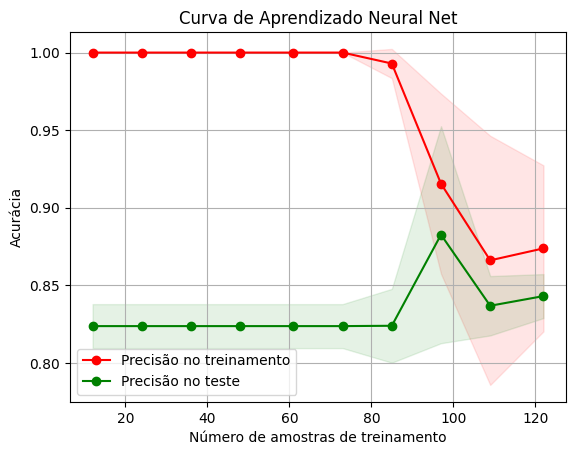

In [16]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

# List of ML packages that we will run
classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

# Name of ML algorithms that we will use
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

# Creating the avaliatives metrics for ROC curve
for item, nome in zip(classifiers, names):

# Defina os tamanhos do conjunto de treinamento para os quais deseja calcular a curva de aprendizado
  train_sizes = np.linspace(0.1, 1.0, 10)  # Aqui, estamos dividindo o intervalo de 0.1 a 1.0 em 10 partes iguais

# Calcule a curva de aprendizado
  train_sizes_abs, train_scores, test_scores = learning_curve(item, x, y, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calcule as médias e os desvios padrão dos escores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

# Plote a curva de aprendizado
  plt.figure()
  plt.title(f"Curva de Aprendizado {nome}")
  plt.xlabel("Número de amostras de treinamento")
  plt.ylabel("Acurácia")
  plt.grid()

  plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
  plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r",
         label="Precisão no treinamento")
  plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g",
         label="Precisão no teste")

  plt.legend(loc="best")
  plt.show()


# **Accuracy assessment in training and test data sets**

# **Permutation importance of the best and worst variables**
- Cell to be debugged
- Future implementations:
https://sharkcoder.com/data-visualization/mpl-barh-chart

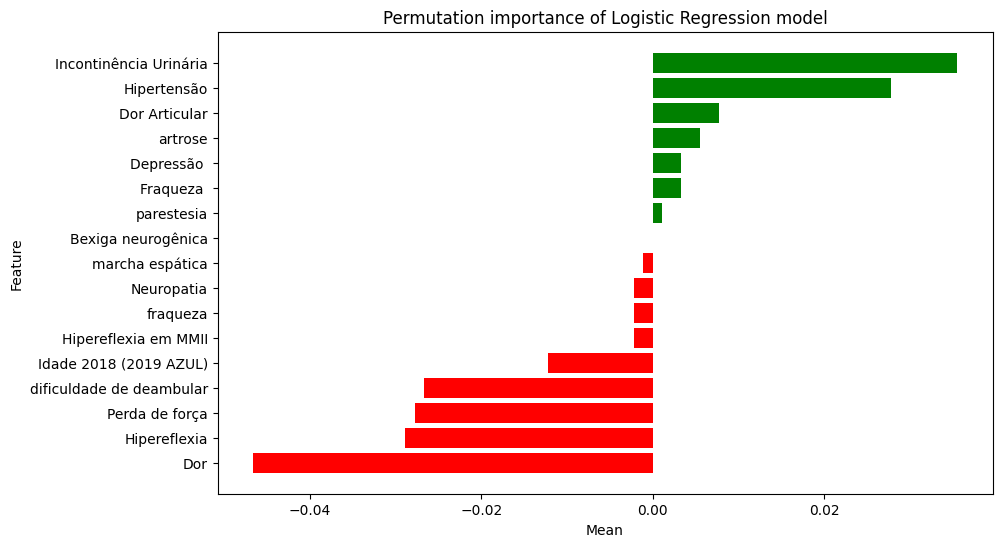

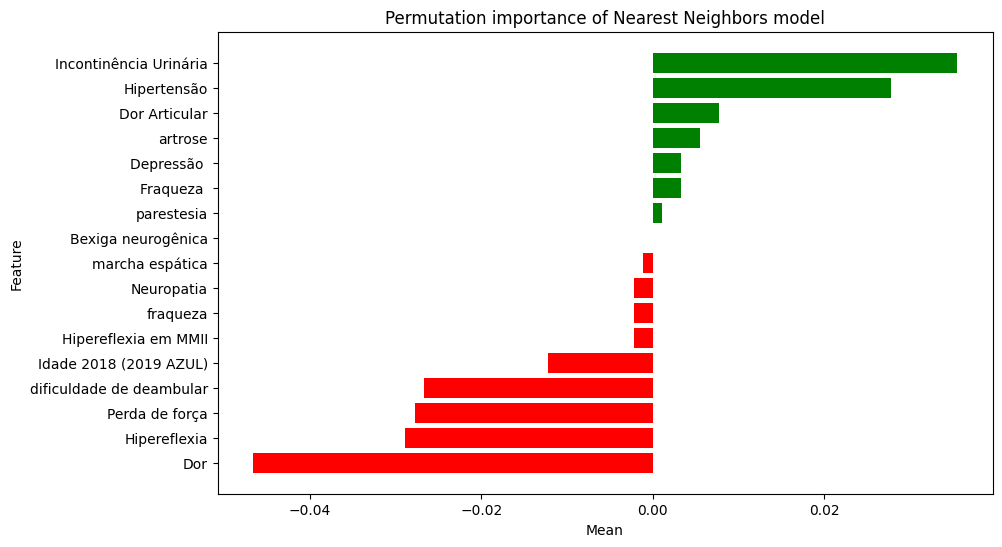

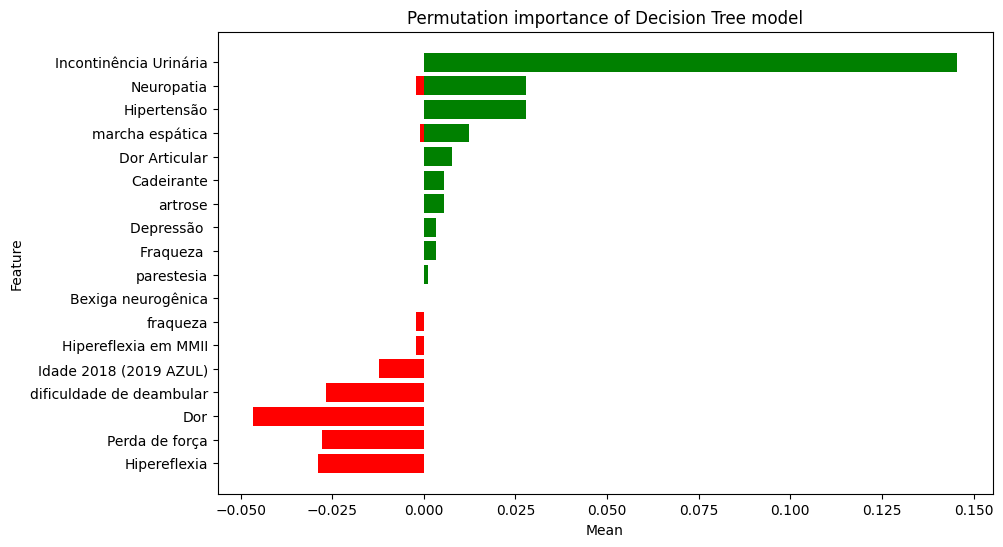

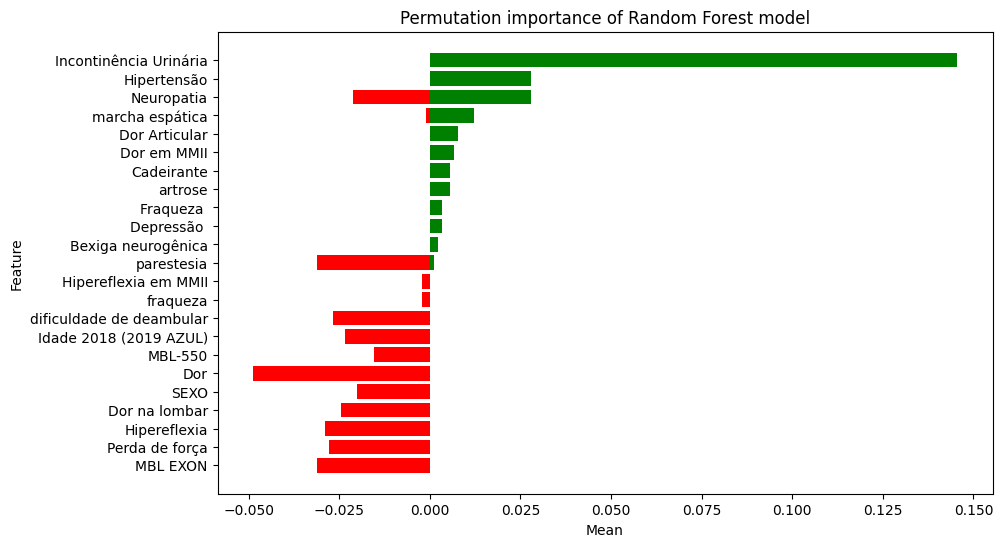

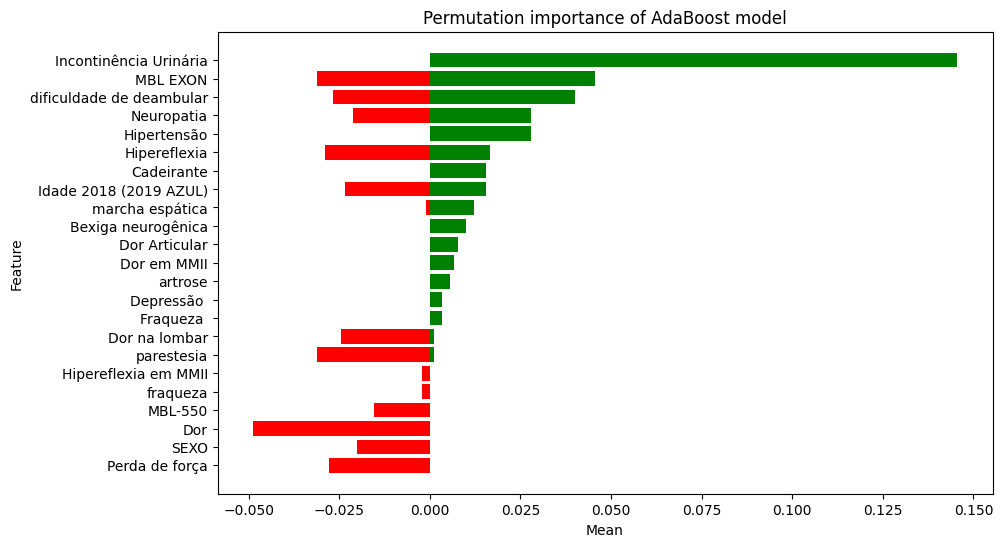

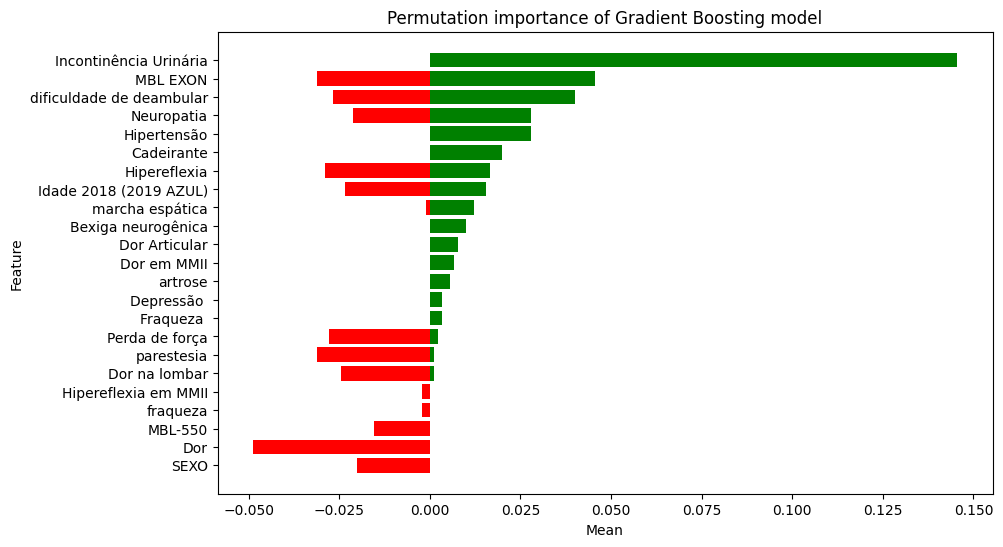

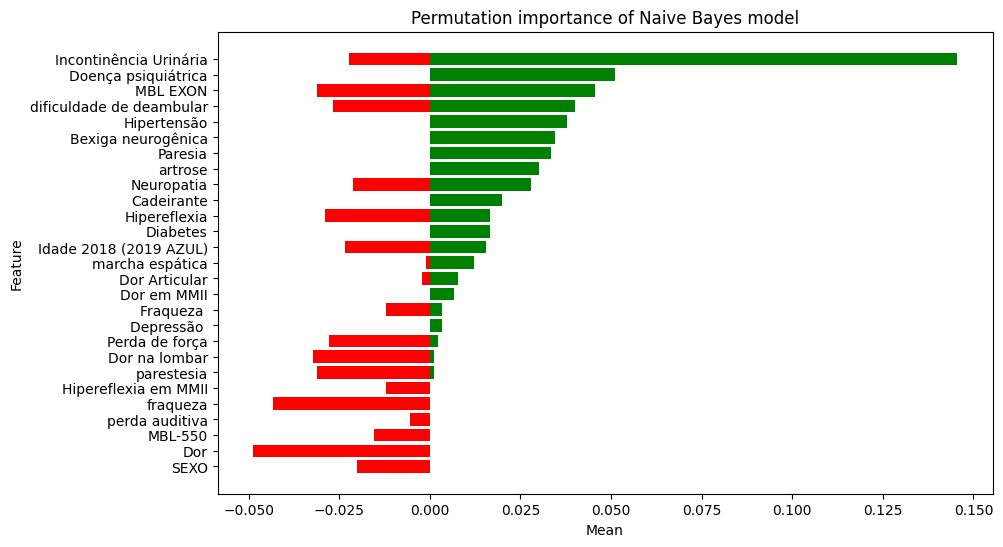

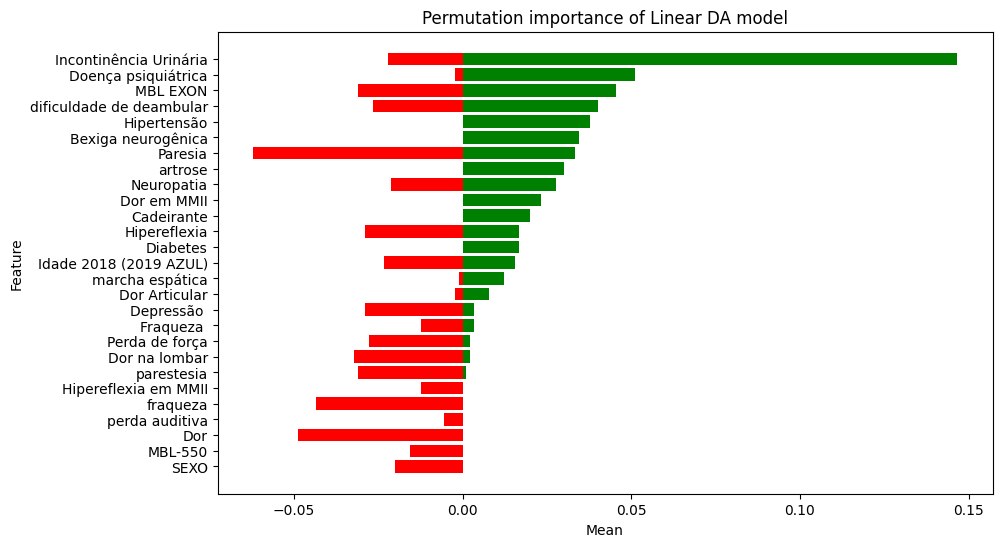

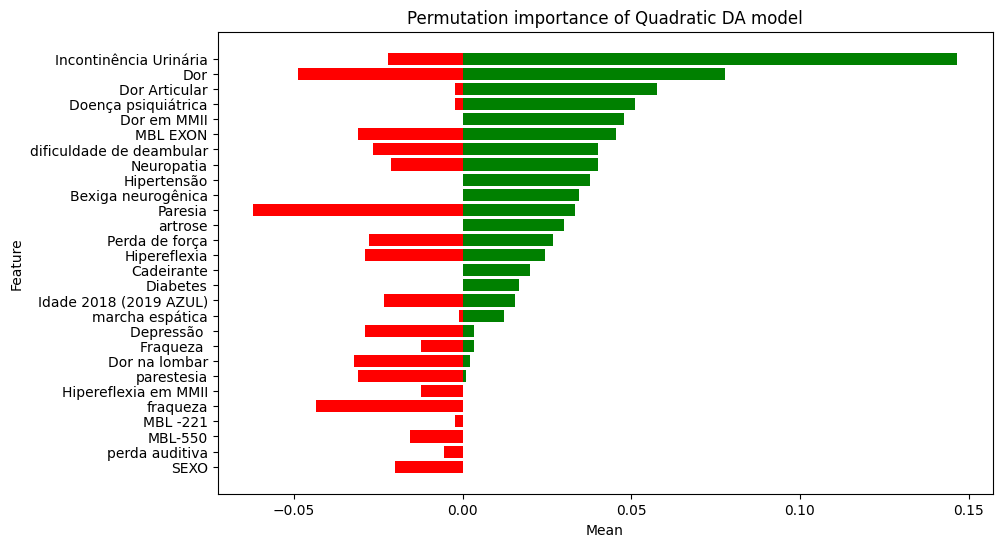

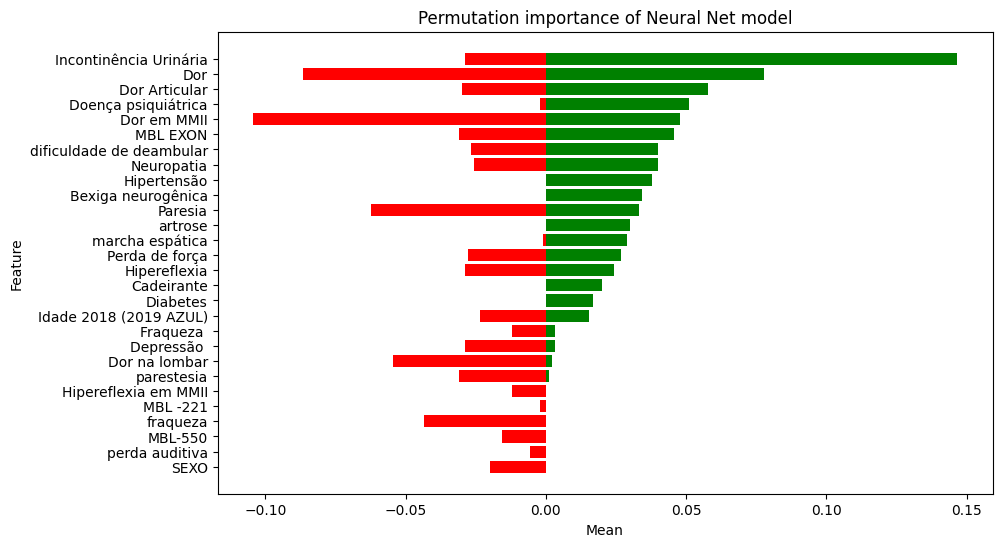

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import os
import shutil

# Create the column_names matrix
column_names = x.columns

# Initialize Excel results DataFrame
excel_results = pd.DataFrame(columns=["Modelo", "Média", "Variável"])

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

for item, nome in zip(classifiers, names):
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Ajustar o classificador aos dados de treinamento
        item.fit(x_train, y_train)

    # Calculate the importance of permutation using the "item" model
    features_contribution = permutation_importance(item, x_test, y_test, n_repeats=30, random_state=0)
    sorted_index = np.argsort(features_contribution.importances_mean)

    # Check that the number of columns_names is equal to the consistent sorted_index
    num_features = min(len(column_names), len(sorted_index))

    #att
    # Append the results to Excel results DataFrame
    for i in range(num_features):
        excel_results = excel_results.append({"Modelo": nome, "Média": features_contribution.importances_mean[sorted_index[i]], "Variável":column_names[sorted_index[i]]}, ignore_index=True)

    # Write the results to an Excel file
    excel_results.to_excel("importance_mean.xlsx", index=False)

    # Pegar os top 10 valores da coluna "Média"
    #Nlargest function return the ten best results ordened by colummn "Média"

    top_10 = excel_results.groupby('Modelo').apply(lambda x: x.nlargest(10, 'Média')).reset_index(drop=True)
    worst_10 = excel_results.groupby('Modelo').apply(lambda x: x.nsmallest(10, 'Média')).reset_index(drop=True)
    selected_data = pd.concat([top_10, worst_10], ignore_index=True)
    selected_data = selected_data[selected_data['Média'] != 0]
    selected_data = selected_data.sort_values(by='Média', ascending= False)

    #color definition
    cores = ['green' if media > 0 else 'red' for media in selected_data['Média']]
    #for index, row in selected_data.iterrows():
      #plt.annotate('{:.2f}'.format(row['Média']), xy=(row['Média'], row[nome]), ha='left', va='center')

    # Generation of bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(selected_data['Variável'], selected_data['Média'], color=cores)
    plt.xlabel('Mean')
    plt.ylabel('Feature')
    plt.title(f"Permutation importance of {nome} model")
    plt.gca().invert_yaxis()  # Inverter o eixo y para que o maior valor apareça no topo
    plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Permutation_graphics/Top_Permutation_importance_{nome}.jpeg')
    plt.show()

    selected_data.to_excel('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/'+"Top_features.xlsx", engine='openpyxl')

# **Feature selection**

In [ ]:
# Identification of the possible features responsible for the overfit based on reading the file feature_importance_train_test.xlsx
# Removing the "overfit" columns from the copy df
df.drop('Hipereflexia', axis=1, inplace=True)
df.drop('Hiperatividade', axis=1, inplace=True)
df.drop('Mielopatia', axis=1, inplace=True)
df.drop('Cadeirante', axis=1, inplace=True)
df.drop('MBL-550_HL', axis=1, inplace=True)


# Binary categorical data
cat_bin = ['Sexo', 'Idade', 'HAM/TSP', 'Incontinência Urinária', 'Dor urinária', 'parestesia',
       'Paresia', 'Hipereflexia em MMII','fraqueza', 'caroços no corpo', 'disúria', 'Deficit motor', 'Dormência',
       'Dor', 'Dor Articular', 'Dor na bexiga', 'Dor na lombar', 'Dor em MMII',
       'perda auditiva', 'Hipertensão', 'marcha espática', 'artrose',
       'dificuldade de deambular', 'Perda de força', 'Espasticidade',
       'Noctúria', 'Neuropatia', 'Bexiga neurogênica', 'Surtos psiquicos',
       'Crises compulsivas', 'Insônia', 'hipertomocidade',
       'Câimbras', 'Diabetes', 'Obesidade', 'Depressão ',
       'Ansiedade', 'Poliaciúria', 'Baixo fluxo urinário', 'Esquizofrenia',
       'Problemas nos MMII', 'Edema MMSS', 'Doença psiquiátrica',
       'Osteoporose', 'Insuficiência renal crônica',
       'Descontrole esfincteriano', 'Hérnia', 'Dificuldade de urinar',
       'Fraqueza ', 'Hipotireodismo', 'Descontrole urinário',
       'Síndrome piramidal', 'Dermatite', 'Sífilis', 'Infecções recorrentes', 'MBL-550_HH', 'MBL-550_LL',
       'MBL-221_YY', 'MBL-221_YX', 'MBL-221_XX', 'MBL-EXON_AO', 'MBL-EXON_AA',
       'MBL-EXON_OO']

# Multiple categorical data
cat_mult= ['SINTOMAS', 'MBL-550', 'MBL -221', 'MBL EXON']

# All data
all_data = cat_bin + cat_mult

KeyError: "['Hipereflexia'] not found in axis"

Cleaning non-numerical data with no predictive value for ML

In [ ]:
# Separate the variables into predictors and target variables (style);
y = df['HAM/TSP'] # Target variables;
x = df.drop('HAM/TSP', axis = 1) # Predict variables, without aim;

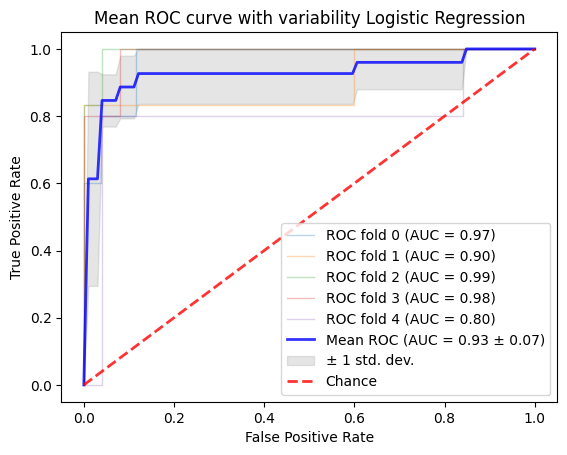

Média da precisão: 0.9099999999999999
Media do desvio padrão: 0.11135528725660043
Média da acurácia: 0.9088172043010753
Media da taxa de recall: 0.5666666666666667
Media do parâmetro f1: 0.6766666666666666


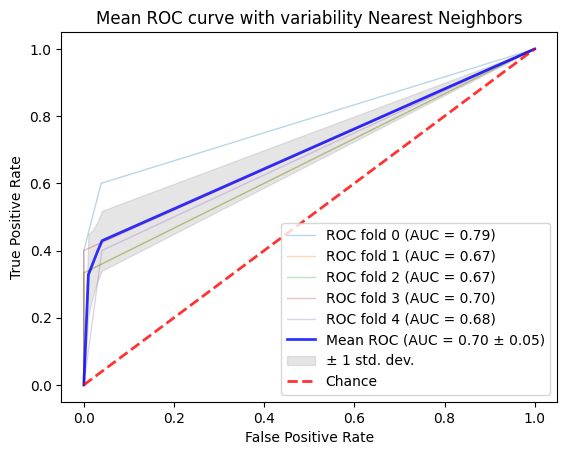

Média da precisão: 0.2
Media do desvio padrão: 0.4000000000000001
Média da acurácia: 0.8365591397849462
Media da taxa de recall: 0.08
Media do parâmetro f1: 0.1142857142857143


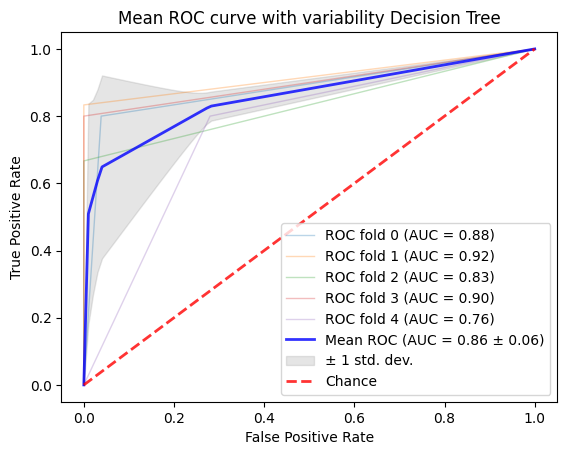

Média da precisão: 0.8327272727272726
Media do desvio padrão: 0.24700520287624286
Média da acurácia: 0.907741935483871
Media da taxa de recall: 0.7799999999999999
Media do parâmetro f1: 0.7795959595959596


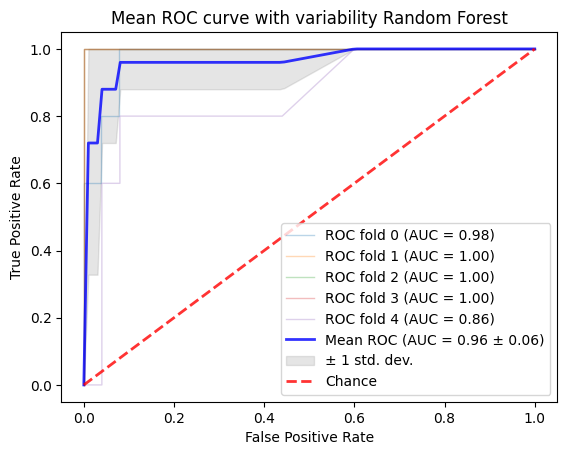

Média da precisão: 0.85
Media do desvio padrão: 0.2
Média da acurácia: 0.9212903225806451
Media da taxa de recall: 0.74
Media do parâmetro f1: 0.776006216006216


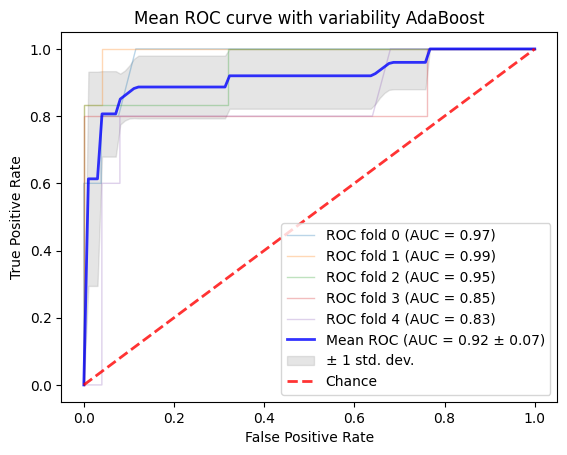

Média da precisão: 0.86
Media do desvio padrão: 0.19595917942265426
Média da acurácia: 0.927741935483871
Media da taxa de recall: 0.7799999999999999
Media do parâmetro f1: 0.8026728826728828


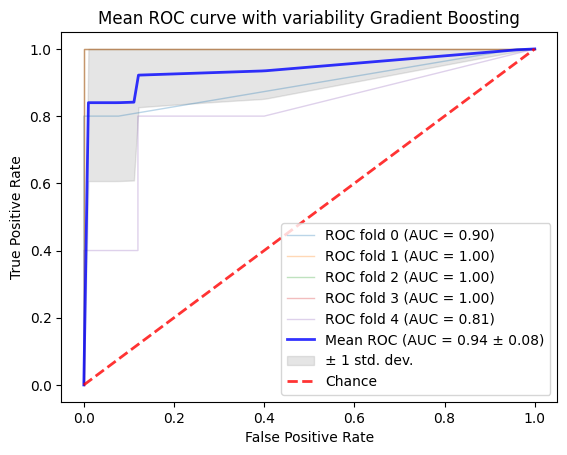

Média da precisão: 0.8742857142857142
Media do desvio padrão: 0.17009001218442535
Média da acurácia: 0.9279569892473118
Media da taxa de recall: 0.7466666666666667
Media do parâmetro f1: 0.7911111111111111


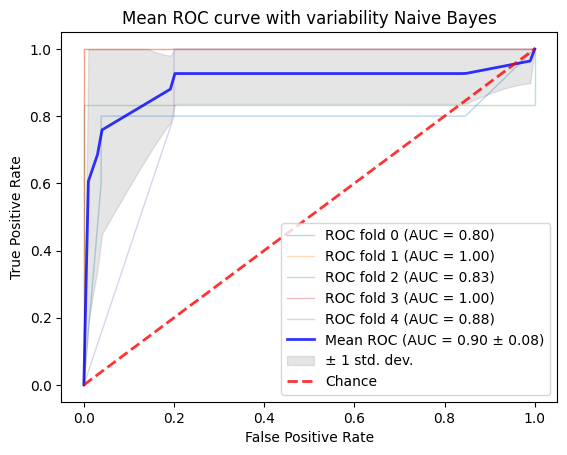

Média da precisão: 0.8388888888888889
Media do desvio padrão: 0.21970799925872433
Média da acurácia: 0.9081720430107527
Media da taxa de recall: 0.7066666666666667
Media do parâmetro f1: 0.7405483405483405


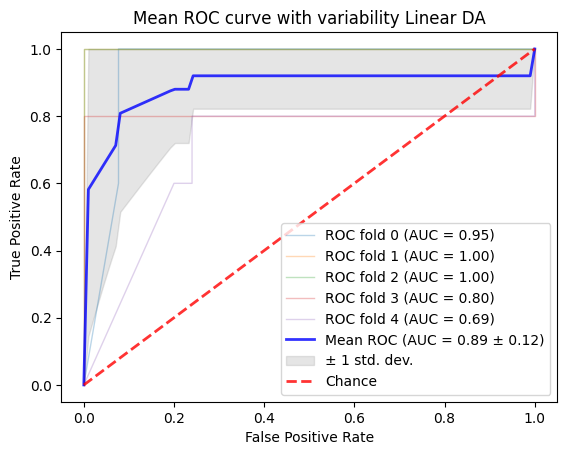

Média da precisão: 0.8
Media do desvio padrão: 0.25298221281347033
Média da acurácia: 0.8950537634408603
Media da taxa de recall: 0.7066666666666667
Media do parâmetro f1: 0.7195959595959596


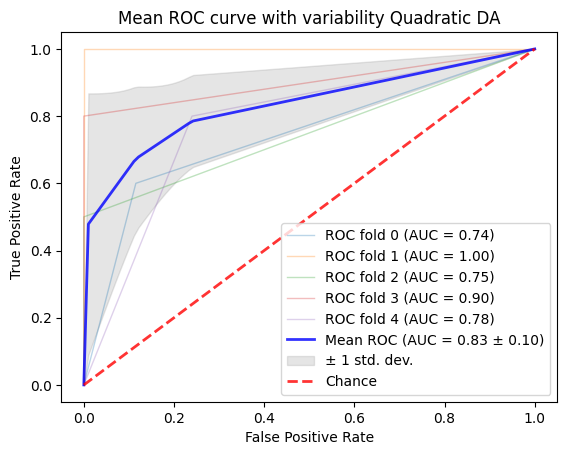

Média da precisão: 0.78
Media do desvio padrão: 0.2712931993250107
Média da acurácia: 0.8950537634408603
Media da taxa de recall: 0.74
Media do parâmetro f1: 0.7268686868686868


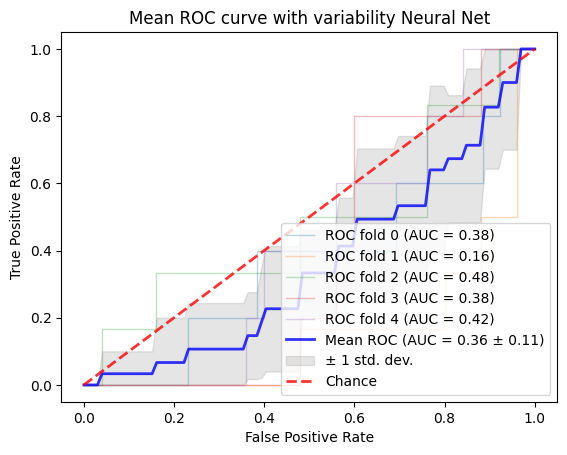

Média da precisão: 0.0
Media do desvio padrão: 0.0
Média da acurácia: 0.8236559139784946
Media da taxa de recall: 0.0
Media do parâmetro f1: 0.0


<Figure size 640x480 with 0 Axes>

In [ ]:
# Clearing old data from the data_table, if the code has been run previously
data_table = pd.DataFrame()
seed = 42
n_splits = 5

# List of ML packages that we will run
classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

# Name of ML algorithms that we will use
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

# Creating the avaliatives metrics for ROC curve
for item, nome in zip(classifiers, names):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

# Testing the model
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)): # metrics
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        item.fit(x_train, y_train)

# Ploting avaliative metrics of ROC curva
        y_proba = item.predict_proba(x_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f"ROC fold {fold} (AUC = {roc_auc:.2f})")
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f"Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=2, alpha=0.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label='± 1 std. dev.')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Mean ROC curve with variability ' + nome)
    plt.legend(loc="lower right")
    plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Results without overfitting variables_20_03_24/' + 'Mean ROC curve with variability ' + nome + '.pdf')
    plt.show()


# Calculation and print of F1 and associated metrics
    precision_mean_score = cross_val_score(item, x, y, scoring="precision", cv=5).mean()
    std_score = cross_val_score(item, x, y, scoring="precision", cv=5).std()
    accuracy_mean_score = cross_val_score(item, x, y, scoring="accuracy", cv=5).mean()
    recall_mean_score = cross_val_score(item, x, y, scoring="recall", cv=5).mean()
    f1_mean_score = cross_val_score(item, x, y, scoring="f1", cv=5).mean()

    print(f"Média da precisão: {precision_mean_score}")
    print(f"Media do desvio padrão: {std_score}")
    print(f"Média da acurácia: {accuracy_mean_score}")
    print(f"Media da taxa de recall: {recall_mean_score}")
    print(f"Media do parâmetro f1: {f1_mean_score}")

# Creating the data frames that  values to be saved
    results_mean_precision = pd.DataFrame({'Precision Mean': [precision_mean_score]})
    results_mean_accuracy = pd.DataFrame({'Accuracy Mean': [accuracy_mean_score]})
    results_mean_recall = pd.DataFrame({'Recall Mean': [recall_mean_score]})
    results_mean_f1 = pd.DataFrame({'F1 Mean': [f1_mean_score]})

# creating the data frames (with the values of interest) that will be plotted in txt file
    f1_metrics = pd.DataFrame(
    [{
        "Nome": nome,
        "Accuracy": results_mean_accuracy.iloc[0]['Accuracy Mean'],
        "Recall": results_mean_recall.iloc[0]['Recall Mean'],
        "Precision": results_mean_precision.iloc[0]['Precision Mean'],
        "F1 Score": results_mean_f1.iloc[0]['F1 Mean'],
    }]
)

    data_table = data_table.append(f1_metrics)
data_table = np.round(data_table.reset_index(drop=True), 2)

# Aesthetic transformation similar to a heatmap
styled_table = data_table.sort_values(by='Accuracy', ascending=False)\
      .style.background_gradient(cmap='coolwarm')\
      .bar(subset=['Recall'], color='#ff355d')\
      .bar(subset=['Precision'], color='lightseagreen')\
      .bar(subset=['F1 Score'], color='gold')\

plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Results without overfitting variables_20_03_24/Permutation importance/' + f'Mean ROC curve with variability {nome}.pdf')

# Save the generated excel file
styled_table.to_excel('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Results without overfitting variables_20_03_24/'+" F1_metrics.xlsx", engine='openpyxl')

# **Evaluation of the general permutation importance of test model without the possible "overfitting features"**

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import os
import shutil

# Create the column_names matrix
column_names = df.columns
n_splits = 5
data_table = pd.DataFrame()
seed = 42

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

for item, nome in zip(classifiers, names):
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        item.fit(x_test, y_test)

    # Calculate the importance of permutation using the "item" model
    features_contribution = permutation_importance(item, x_train, y_train, n_repeats=30, random_state=0)
    sorted_index = np.argsort(features_contribution.importances_mean)

    # Check that the number of columns_names is equal to the consistent sorted_index
    num_features = min(len(column_names), len(sorted_index))

    # Printing permutation importance values and sending them to the drive
    with open(f'General Permutation importance.txt {nome}', 'w') as arquivo:
        print(f'Classifier: {nome}', file=arquivo)
        for i in range(num_features):
            coluna = df.columns[sorted_index[i]]
            print(f"Feature: {coluna} - Importance: {features_contribution.importances_mean[sorted_index[i]]:.3f} +/- {features_contribution.importances_std[sorted_index[i]]:.3f}", file=arquivo)
            print(file=arquivo)

    # Define the y-axis labels as the names of the columns sorted by importance
    caminho_arquivo = f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Results without overfitting variables_20_03_24/Permutation importance/Graphs{nome}.txt'
    caminho_origem = f'General Permutation importance.txt {nome}'
    if os.path.exists(caminho_origem):
        # Move the file to the destination
        shutil.move(caminho_origem, caminho_arquivo)
        print(f"Arquivo referente ao modelo {nome} salvo com sucesso!")
    else:
        print(f"Arquivo referente ao modelo {nome} não foi encontrado")

    # Plotting the horizontal bar chart
    plt.figure(figsize=(25, 8))
    plt.barh(range(x_train.shape[1]), features_contribution.importances_mean[sorted_index], color='skyblue')
    plt.yticks(range(x_train.shape[1]), [column_names[i] for i in sorted_index], fontsize=10)
    plt.xlabel('Contribution to the model')
    plt.title(f'Permutation importance by {nome} model', fontsize=20, y=1.05)

    plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Results without overfitting variables_20_03_24/Permutation importance/Graphs/Permutation importance model {nome}.jpeg')
    plt.show()


# **Evaluation of the permutation importance of the training and test group without the possible "overfitting features"**

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import os
import shutil

# Create df and lists
column_names = x.columns
n_splits = 5
data_table = pd.DataFrame()
seed = 42
excel_results_train = []
excel_results_test = []

# StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

for item_train, nome in zip(classifiers, names):
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        item_train.fit(x_train, y_train)

for item_test, nome in zip(classifiers, names):
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        item_test.fit(x_test, y_test)

# Calculate the permutation importance of training and test models using the "item" model
    features_contribution_train = permutation_importance(item_train, x_train, y_train, n_repeats=10, random_state=0)
    sorted_index_train = np.argsort(features_contribution_train.importances_mean)

    features_contribution_test = permutation_importance(item_test, x_test, y_test, n_repeats=10, random_state=0)
    sorted_index_test = np.argsort(features_contribution_test.importances_mean)


# Check that the number of columns_names is equal to the consistent sorted_index
    num_features_train = min(len(column_names), len(sorted_index_train))
    num_features_test = min(len(column_names), len(sorted_index_test))


# Inicialize DataFrames emptys to the traning and test results
    excel_results_train = pd.DataFrame(columns=["Train Model", "Média", "Variável"])
    excel_results_test = pd.DataFrame(columns=["Test Model", "Média", "Variável"])

# Loop for plotting training results
    for i in range(num_features_train):
      excel_results_train = excel_results_train.append({"Train Model": nome, "Média": features_contribution_train.importances_mean[sorted_index_train[i]], "Variável":column_names[sorted_index_train[i]]}, ignore_index=True)

# Loop for plotting test results
    for i in range(num_features_test):
      excel_results_test = excel_results_test.append({"Test Model": nome, "Média": features_contribution_test.importances_mean[sorted_index_test[i]], "Variável":column_names[sorted_index_test[i]]}, ignore_index=True)

# Nlargest and nsmallest return the mosts expressive results ordened by colummn "Média"
# By training model results
    top_train = excel_results_train.groupby('Train Model').apply(lambda x: x.nlargest(10, 'Média')).reset_index(drop=True)
    worst_train = excel_results_train.groupby('Train Model').apply(lambda x: x.nsmallest(10, 'Média')).reset_index(drop=True)

# By test model results
    top_test = excel_results_test.groupby('Test Model').apply(lambda x: x.nlargest(10, 'Média')).reset_index(drop=True)
    worst_test = excel_results_test.groupby('Test Model').apply(lambda x: x.nsmallest(10, 'Média')).reset_index(drop=True)

# Plot of best and worst results together
# By training model results
    selected_data_train = pd.concat([top_train, worst_train], ignore_index=True)
    selected_data_train = selected_data_train.sort_values(by='Média', ascending= True)

# By test model results
    selected_data_test = pd.concat([top_test, worst_test], ignore_index=True)
    selected_data_test = selected_data_test.sort_values(by='Média', ascending= True)

# color definition
    cores = ['green' if media > 0 else 'red' for media in selected_data_test['Média']]
    cores = ['green' if media > 0 else 'red' for media in selected_data_train['Média']]

# Plotting the horizontal bar chart
    fig, axs = plt.subplots(2, figsize=(25, 8))

# Graph 1 --> train
    axs[0].barh(range(len(selected_data_train)), selected_data_train['Média'], color='skyblue')
    axs[0].set_yticks(range(len(selected_data_train)), selected_data_train['Variável'], fontsize=10)
    axs[0].set_xlabel('Contribution to the TRAINING model')
    axs[0].set_title(f'Permutation importance by {nome} model', fontsize=20, y=1.05)

# Graph 2 --> test
    axs[1].barh(range(len(selected_data_test)), selected_data_test['Média'], color='skyblue')
    axs[1].set_yticks(range(len(selected_data_test)), selected_data_test['Variável'], fontsize=10)
    axs[1].set_xlabel('Contribution to the TEST model')
    axs[1].set_title(f'Permutation importance by {nome} model', fontsize=20, y=1.05)

# Printing the results
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Results without overfitting variables_20_03_24/Permutation importance/Graphs/Permutation importance train and test {nome}.jpeg')
    plt.show()


In [ ]:
# Calculation of histograms of collumns

# Printing results
with open('Distribution_curves.txt', 'w') as arquivo:
 for coluna in ['MBL-550', 'MBL -221', 'MBL EXON']:
    plt.figure()
    sns.distplot(df[coluna])
    plt.title(f'Histograma da Coluna {coluna}')
    plt.show()
# Organizing the results and sending them to the drive

caminho_arquivo = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Distribution_curves.txt'
if os.path.exists(caminho_arquivo):
    os.remove(caminho_arquivo)
    print('Old file successfully removed.')

destino = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/'
shutil.move('Distribution_curves.txt', destino)
print('File moved to destination directory.')

KeyError: 'MBL-550'

<Figure size 640x480 with 0 Axes>

# **Analisys of features by SHAP**

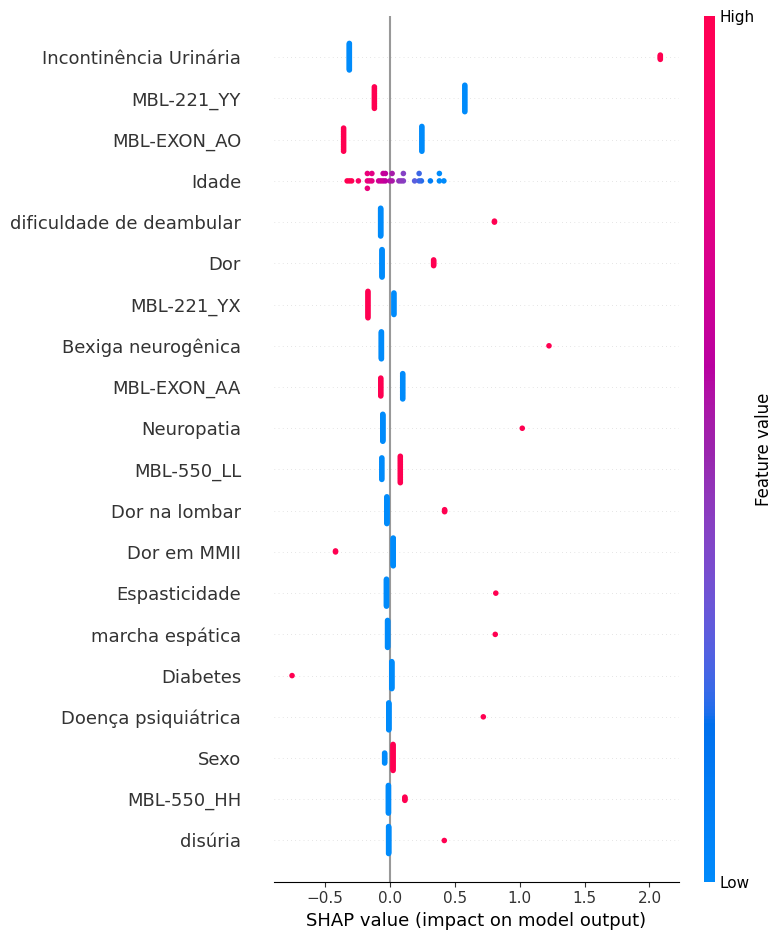

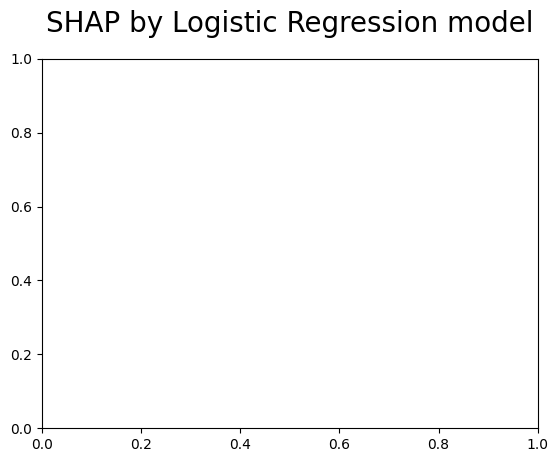

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Results without overfitting variables_20_03_24/SHAP/ModelLogistic Regression.png'

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Create df and lists
column_names = x.columns
n_splits = 5
seed = 42

# List of ML with best predictive values
selected_classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
]

# Name of ML algorithms that we will use
selected_names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
]

# StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

for item, nome in zip(selected_classifiers, selected_names):
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        item.fit(x_train, y_train)

        # Inicialize o explorador SHAP com o modelo treinado
        explainer = shap.Explainer(item, x_train)

        # Calcule os valores SHAP para o conjunto de testes
        shap_values = explainer.shap_values(x_test)

        # Visualize as importâncias dos recursos
        shap.summary_plot(shap_values, x_test)

        # Adicionar legenda
        plt.title(f'SHAP by {nome} model', fontsize=20, y=1.05)
        plt.show()
        plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Results without overfitting variables_20_03_24/SHAP/Model{nome}')


# Data prevision randomly: (Cell to be debugged)


In [ ]:
# Data prevision randomly:
previsoes = item.predict(x_test[40:45])
previsoes_formatada = ', '.join(str(valor) for valor in previsoes) # concatena lista e converte valores em strings, apresentados separados por ",";
previsoes_formatada = ["Sem mielopatia" if valor == 0 else "HAM/TSP" for valor in previsoes]


print(f"O valor indicado pelo modelo corresponde há: \n{previsoes_formatada} \n")

# Template:
y_teste_lista = y_teste[40:45]
y_teste_lista = ["HAM/TSP" if valor == 1 else "Sem mielopatia" for valor in previsoes]
print(f"O valor real (gabarito), corresponde há:\n{y_teste_lista}")


In [ ]:
# Analysis of mean, variance, standard deviation, skewness, kurtosis and maximum and minimum values per column
# Calculation of appraised values
mean = df.mean()
var = df.var()
skewness = df.apply(skew)
kurt = df.apply(kurtosis)

# Printing results
with open('Exploratory_Analysis.txt', 'w') as arquivo:
  for i in range(len(df.columns)):
    coluna = df.columns[i]
    print(f'Coluna: {coluna}', file=arquivo)
    print('Média:', df.iloc[:, i].mean(), file=arquivo)
    print('Variância:', df.iloc[:, i].var(), file=arquivo)
    print('Desvio Padrão:', df.iloc[:, i].std(), file=arquivo)
    print('Assimetria:', skew(df.iloc[:, i]), file=arquivo)
    print('Curtose:', kurtosis(df.iloc[:, i]), file=arquivo)
    print('Val. Min:', df.iloc[:, i].min(), file=arquivo)
    print('Val. Max:', df.iloc[:, i].max(), file=arquivo)
    print(file=arquivo)

# Organizing the results and sending them to the drive

caminho_arquivo = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Exploratory_Analysis.txt'
if os.path.exists(caminho_arquivo):
    os.remove(caminho_arquivo)
    print('Old file successfully removed.')

destino = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/'
shutil.move('Exploratory_Analysis.txt', destino)
print('File moved to destination directory.')


TypeError: unsupported operand type(s) for /: 'str' and 'int'